## 1. Data Preparation & EDA

In [101]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [102]:
#read the data
housing = pd.read_csv('train.csv')
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0   1          60       RL         65.0     8450   Pave   NaN      Reg  \
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold   
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2  \
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [103]:
test_data = pd.read_csv('test.csv')
test_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0  1461          20       RH         80.0    11622   Pave   NaN      Reg  \
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature   
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN  \
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [104]:
#checking shape of dataset
housing.shape

(1460, 81)

In [105]:
#checking info of dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [106]:
numeric_data = housing.select_dtypes(include = ['float64','int64'])
numeric_data.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt   
0   1          60         65.0     8450            7            5       2003  \
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF   
0          2003       196.0         706  ...           0           61  \
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold   
0              0          0            0         0        0       2    2008  \
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [107]:
#checking percentage of null values in each column
df_missing=pd.DataFrame((round(100*(housing.isnull().sum()/len(housing.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

missing
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
Electrical       0.07
Id               0.00

In [108]:
test_df_missing=pd.DataFrame((round(100*(test_data.isnull().sum()/len(test_data.index)), 2)), columns=['missing'])
test_df_missing.sort_values(by=['missing'], ascending=False).head(20)

missing
PoolQC          99.79
MiscFeature     96.50
Alley           92.67
Fence           80.12
MasVnrType      61.27
FireplaceQu     50.03
LotFrontage     15.56
GarageYrBlt      5.35
GarageQual       5.35
GarageFinish     5.35
GarageCond       5.35
GarageType       5.21
BsmtCond         3.08
BsmtQual         3.02
BsmtExposure     3.02
BsmtFinType1     2.88
BsmtFinType2     2.88
MasVnrArea       1.03
MSZoning         0.27
BsmtHalfBath     0.14

In [109]:
#reading data dictionary

f = open("data_description.txt", "r")
print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [110]:
#addressing NaN values based on data dictionary

# In column 'PoolQC' (Pool quality), NaN stands for No Pool
housing['PoolQC'] = housing['PoolQC'].fillna('No_Pool')

# In column 'MiscFeature' (Miscellaneous Features), NaN stands for None, meaning the house has no miscellaneous features.
housing['MiscFeature'] = housing['MiscFeature'].fillna('None')

# In column 'Alley', NaN stands for No Alley Access as per the data dictionary
housing['Alley'] = housing['Alley'].fillna('No_Alley_Access')

# In column 'Fence' (Fence Quality), NaN stands for No Fence as per the data dictionary
housing['Fence'] = housing['Fence'].fillna('No_Fence')

# In column 'FireplaceQu' (FireplaceQu Quality), NaN stands for No Fireplace as per the data dictionary
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('No_Fireplace')

# LotFrontage stands for Linear feet of street connected to property, there is no explanation to impute this in data dictionary
# Let's consider imputing it with median of the lotFrontage of houses in the same neighbourhood

# Group data by neighborhood and impute missing value with median LotFrontage of all the neighborhood
housing["LotFrontage"] = housing.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# In column 'GarageYrBlt' (Gargae Year Built), NaN stands for houses with no garage, let's impute with 0
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(0)

# 'GarageType', 'GarageFinish', 'GarageQual' (Garage Quality) and 'GarageCond'(Garage Condition)
# Missing values signify no garage as per data dictionary.let's impute NaN values here with No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    housing[col] = housing[col].fillna('No_Garage')

#BsmtFinType1, BsmtFinType2 (Rating of basement finished area),
#BsmtExposure (Basement Exposure), BsmtQual(Basement Quality), BsmtCond (Basement Conidtion)
#These are all parameter related to basement. A NaN value probably signifies that the house does not have a basement.
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    housing[col] = housing[col].fillna('No_Basement')
    
# In column 'MasVnrType' (Masonry veneer type), let's impute it with mode "None"
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')

# In column 'MasVnrType' (Masonry veneer type), let's impute it with mode 0 corresponding to None
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)

# In column 'Electrical' (Electrical system), let's impute NaN with "Other"
housing['Electrical'] = housing['Electrical'].fillna("Other")

housing

Id  MSSubClass MSZoning  LotFrontage  LotArea Street            Alley   
0        1          60       RL         65.0     8450   Pave  No_Alley_Access  \
1        2          20       RL         80.0     9600   Pave  No_Alley_Access   
2        3          60       RL         68.0    11250   Pave  No_Alley_Access   
3        4          70       RL         60.0     9550   Pave  No_Alley_Access   
4        5          60       RL         84.0    14260   Pave  No_Alley_Access   
...    ...         ...      ...          ...      ...    ...              ...   
1455  1456          60       RL         62.0     7917   Pave  No_Alley_Access   
1456  1457          20       RL         85.0    13175   Pave  No_Alley_Access   
1457  1458          70       RL         66.0     9042   Pave  No_Alley_Access   
1458  1459          20       RL         68.0     9717   Pave  No_Alley_Access   
1459  1460          20       RL         75.0     9937   Pave  No_Alley_Access   

     LotShape LandContour Utilities  ... PoolArea   PoolQC     Fence   
0         Reg         Lvl    AllPub  ...        0  No_Pool  No_Fence  \
1         Reg         Lvl    AllPub  ...        0  No_Pool  No_Fence   
2         IR1         Lvl    AllPub  ...        0  No_Pool  No_Fence   
3         IR1         Lvl    AllPub  ...        0  No_Pool  No_Fence   
4         IR1         Lvl    AllPub  ...        0  No_Pool  No_Fence   
...       ...         ...       ...  ...      ...      ...       ...   
1455      Reg         Lvl    AllPub  ...        0  No_Pool  No_Fence   
1456      Reg         Lvl    AllPub  ...        0  No_Pool     MnPrv   
1457      Reg         Lvl    AllPub  ...        0  No_Pool     GdPrv   
1458      Reg         Lvl    AllPub  ...        0  No_Pool  No_Fence   
1459      Reg         Lvl    AllPub  ...        0  No_Pool  No_Fence   

     MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0           None       0      2   2008        WD         Normal     208500  
1           None       0      5   2007        WD         Normal     181500  
2           None       0      9   2008        WD         Normal     223500  
3           None       0      2   2006        WD        Abnorml     140000  
4           None       0     12   2008        WD         Normal     250000  
...          ...     ...    ...    ...       ...            ...        ...  
1455        None       0      8   2007        WD         Normal     175000  
1456        None       0      2   2010        WD         Normal     210000  
1457        Shed    2500      5   2010        WD         Normal     266500  
1458        None       0      4   2010        WD         Normal     142125  
1459        None       0      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [111]:
#addressing NaN values based on data dictionary

# In column 'PoolQC' (Pool quality), NaN stands for No Pool
test_data['PoolQC'] = test_data['PoolQC'].fillna('No_Pool')

# In column 'MiscFeature' (Miscellaneous Features), NaN stands for None, meaning the house has no miscellaneous features.
test_data['MiscFeature'] = test_data['MiscFeature'].fillna('None')

# In column 'Alley', NaN stands for No Alley Access as per the data dictionary
test_data['Alley'] = test_data['Alley'].fillna('No_Alley_Access')

# In column 'Fence' (Fence Quality), NaN stands for No Fence as per the data dictionary
test_data['Fence'] = test_data['Fence'].fillna('No_Fence')

# In column 'FireplaceQu' (FireplaceQu Quality), NaN stands for No Fireplace as per the data dictionary
test_data['FireplaceQu'] = test_data['FireplaceQu'].fillna('No_Fireplace')

# LotFrontage stands for Linear feet of street connected to property, there is no explanation to impute this in data dictionary
# Let's consider imputing it with median of the lotFrontage of houses in the same neighbourhood

# Group data by neighborhood and impute missing value with median LotFrontage of all the neighborhood
test_data["LotFrontage"] = test_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# In column 'GarageYrBlt' (Gargae Year Built), NaN stands for houses with no garage, let's impute with 0
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(0)

# 'GarageType', 'GarageFinish', 'GarageQual' (Garage Quality) and 'GarageCond'(Garage Condition)
# Missing values signify no garage as per data dictionary.let's impute NaN values here with No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    test_data[col] = test_data[col].fillna('No_Garage')

#BsmtFinType1, BsmtFinType2 (Rating of basement finished area),
#BsmtExposure (Basement Exposure), BsmtQual(Basement Quality), BsmtCond (Basement Conidtion)
#These are all parameter related to basement. A NaN value probably signifies that the house does not have a basement.
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    test_data[col] = test_data[col].fillna('No_Basement')
    
# In column 'MasVnrType' (Masonry veneer type), let's impute it with mode "None"
test_data['MasVnrType'] = test_data['MasVnrType'].fillna('None')

# In column 'MasVnrType' (Masonry veneer type), let's impute it with mode 0 corresponding to None
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(0)

# In column 'Electrical' (Electrical system), let's impute NaN with "Other"
test_data['Electrical'] = test_data['Electrical'].fillna("Other")

In [112]:
#checking percentage of null values in each column

df_missing=pd.DataFrame((round(100*(housing.isnull().sum()/len(housing.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

missing
Id                0.0
CentralAir        0.0
GarageYrBlt       0.0
GarageType        0.0
FireplaceQu       0.0
Fireplaces        0.0
Functional        0.0
TotRmsAbvGrd      0.0
KitchenQual       0.0
KitchenAbvGr      0.0
BedroomAbvGr      0.0
HalfBath          0.0
FullBath          0.0
BsmtHalfBath      0.0
BsmtFullBath      0.0
GrLivArea         0.0
LowQualFinSF      0.0
2ndFlrSF          0.0
1stFlrSF          0.0
GarageFinish      0.0

We do not have any more null values

below we deal with empty values from test.csv

In [113]:
catgl_feats = test_data.dtypes[test_data.dtypes == 'object'].index
numrl_feats = test_data.dtypes[test_data.dtypes != 'object'].index

Nan_cols = []

cols = test_data.columns
for i in cols:
    if (test_data[i].isnull().sum()/len(test_data))*100 > 0:
        Nan_cols.append(i)

cat_treat_list = []
num_treat_list = []

for i in Nan_cols:
    if i in catgl_feats:
        cat_treat_list.append(i)
    else:
        num_treat_list.append(i)

In [114]:
cat_treat_list

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'KitchenQual',
 'Functional',
 'SaleType']

In [115]:
num_treat_list

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea']

In [116]:
for i in cat_treat_list:
    test_data[i].fillna(test_data[i].mode()[0], inplace = True)

for i in num_treat_list:
    test_data[i].fillna(0, inplace = True)

test_df_missing=pd.DataFrame((round(100*(test_data.isnull().sum()/len(test_data.index)), 2)), columns=['missing'])
test_df_missing.sort_values(by=['missing'], ascending=False).head(20)

missing
Id                0.0
MSSubClass        0.0
GarageType        0.0
FireplaceQu       0.0
Fireplaces        0.0
Functional        0.0
TotRmsAbvGrd      0.0
KitchenQual       0.0
KitchenAbvGr      0.0
BedroomAbvGr      0.0
HalfBath          0.0
FullBath          0.0
BsmtHalfBath      0.0
BsmtFullBath      0.0
GrLivArea         0.0
LowQualFinSF      0.0
2ndFlrSF          0.0
1stFlrSF          0.0
Electrical        0.0
GarageYrBlt       0.0

## 2. EDA and Data Preparation

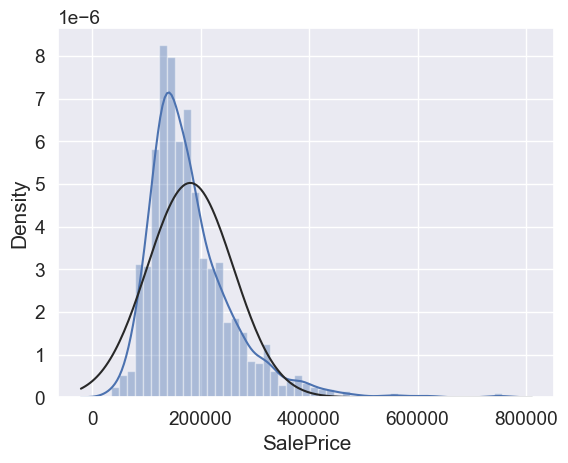

In [117]:
# Let us first visualize the spread of Target Variable 'Sale Price'
from scipy.stats import norm
sns.distplot(housing['SalePrice'], fit=norm)
plt.show()

The Sale Price distribution is not normally distributed, it is a little positively skewed with some houses having really high Sale Price

In [118]:
## "MSSubClass" is a numeric column but it should actually be categorical as per the data dictionary, 
#so let's convert that.

housing=housing.replace({'MSSubClass' : { 20 : '1-STORY 1946 & NEWER ALL STYLES', 
                                          30:'1-STORY 1945 & OLDER',
                                          40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                          45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                          50:'1-1/2 STORY FINISHED ALL AGES',
                                          60:'2-STORY 1946 & NEWER',
                                          70:'2-STORY 1945 & OLDER',
                                          75:'2-1/2 STORY ALL AGES',
                                          80:'SPLIT OR MULTI-LEVEL',
                                          85:'SPLIT FOYER',
                                          90:'DUPLEX - ALL STYLES AND AGES',
                                         120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                         150:'1-1/2 STORY PUD - ALL AGES',
                                         160:'2-STORY PUD - 1946 & NEWER',
                                         180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                         190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}})

In [119]:
numeric_data = housing.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

"ID" column is like row number, it has all unique values and can be ignored for analysis.

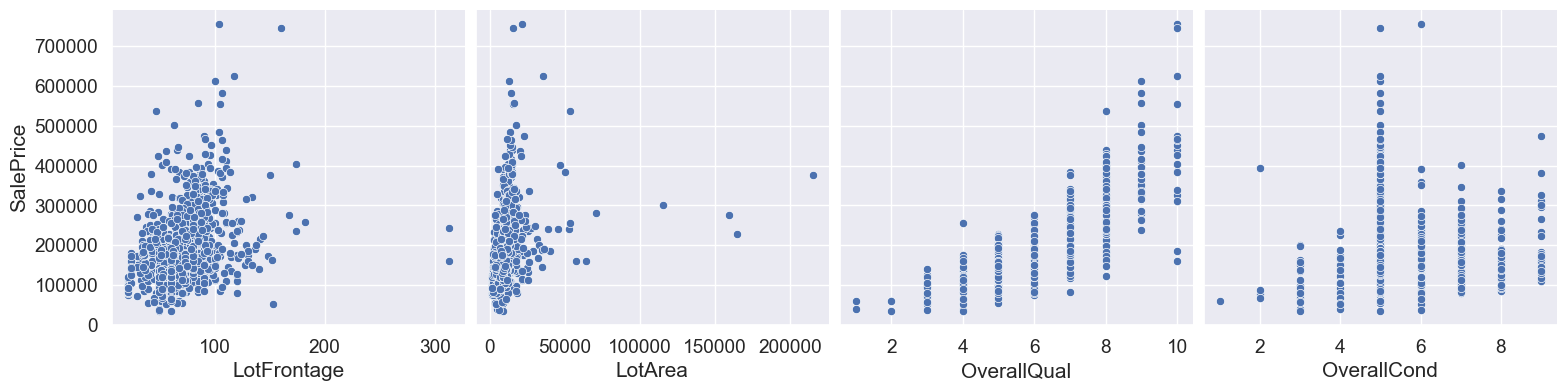

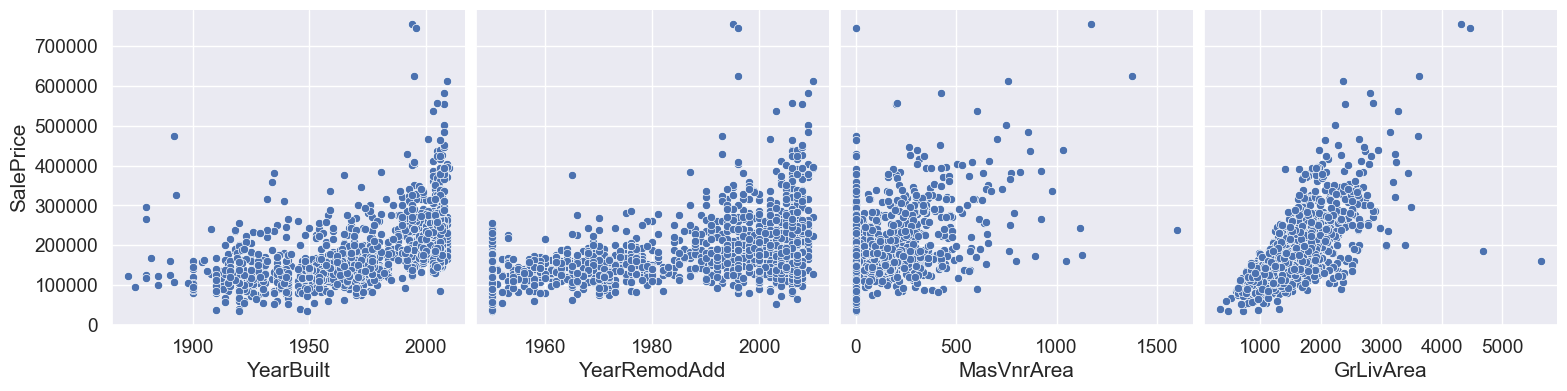

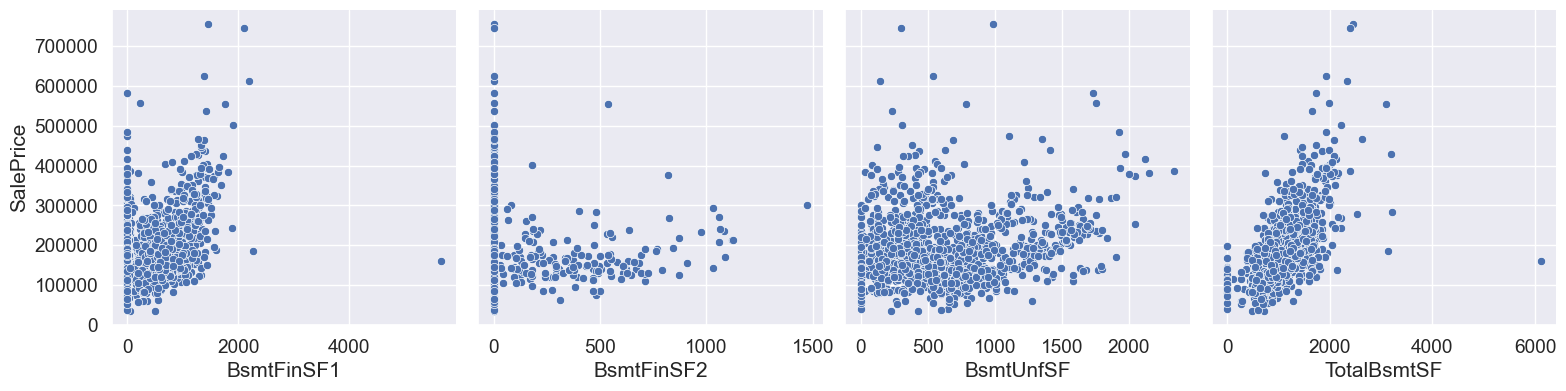

In [120]:
#function to plot scatter plot numeric variables with price

def pp(w,x,y,z):
    sns.pairplot(housing, x_vars=[w,x,y,z], y_vars='SalePrice',height=4, aspect=1, kind='scatter')
    plt.show()

pp('LotFrontage', 'LotArea', 'OverallQual','OverallCond')
pp('YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GrLivArea')
pp('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF')

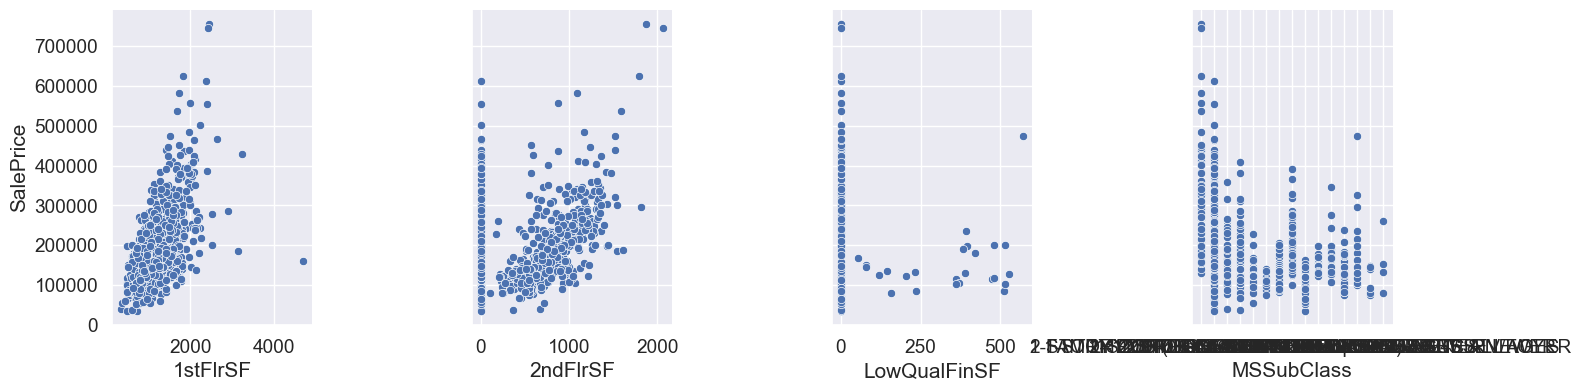

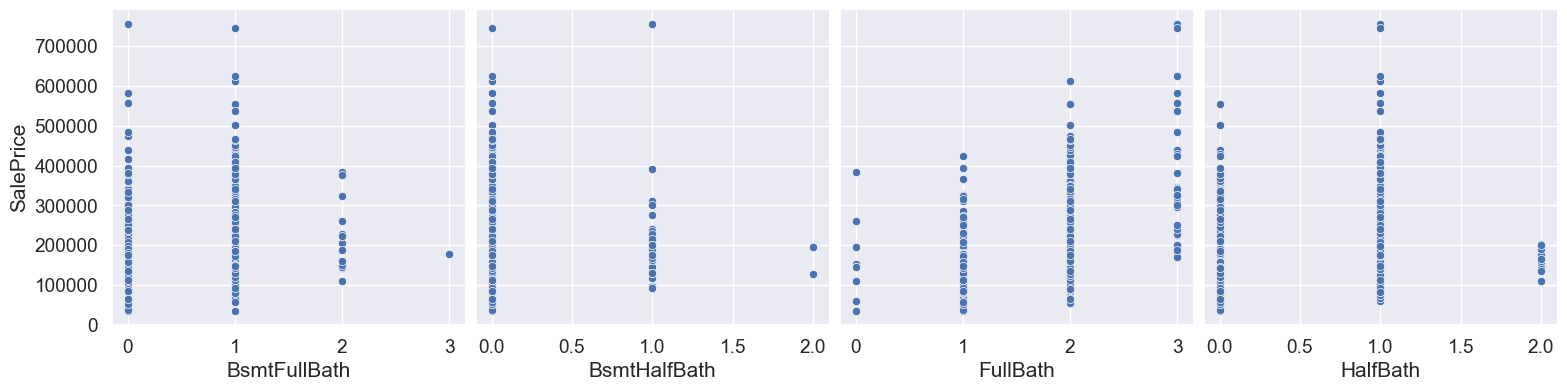

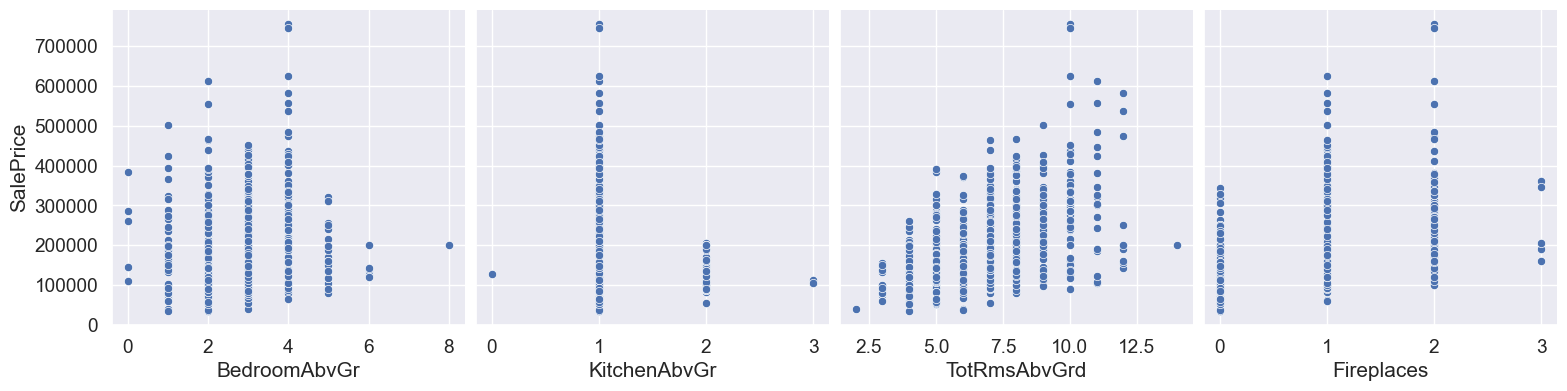

In [121]:
#function to plot scatter plot numeric variables with price

def pp(w,x,y,z):
    sns.pairplot(housing, x_vars=[w,x,y,z], y_vars='SalePrice',height=4, aspect=1, kind='scatter')
    plt.show()

pp('1stFlrSF', '2ndFlrSF','LowQualFinSF','MSSubClass')
pp('BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath')
pp('BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces')

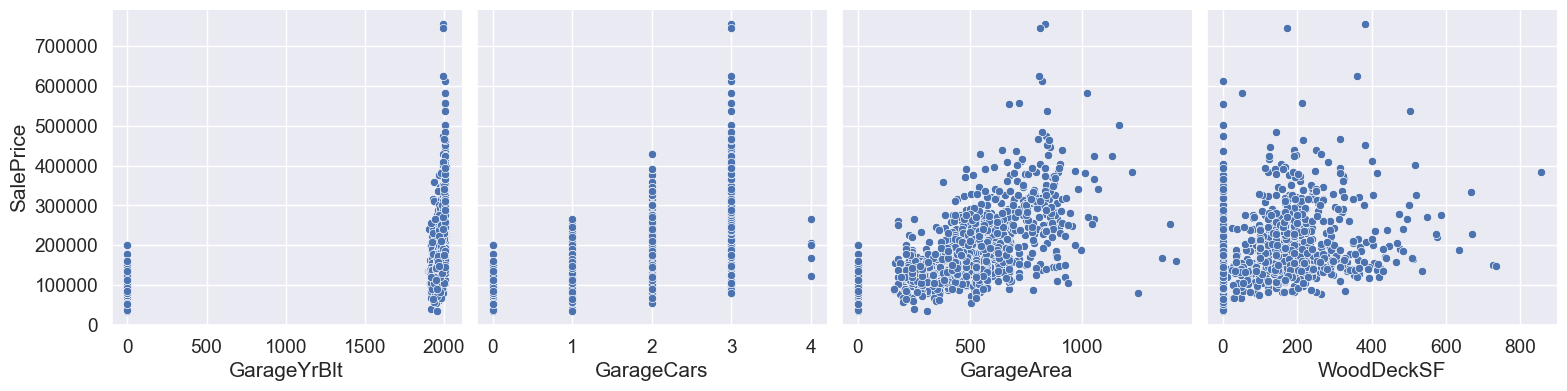

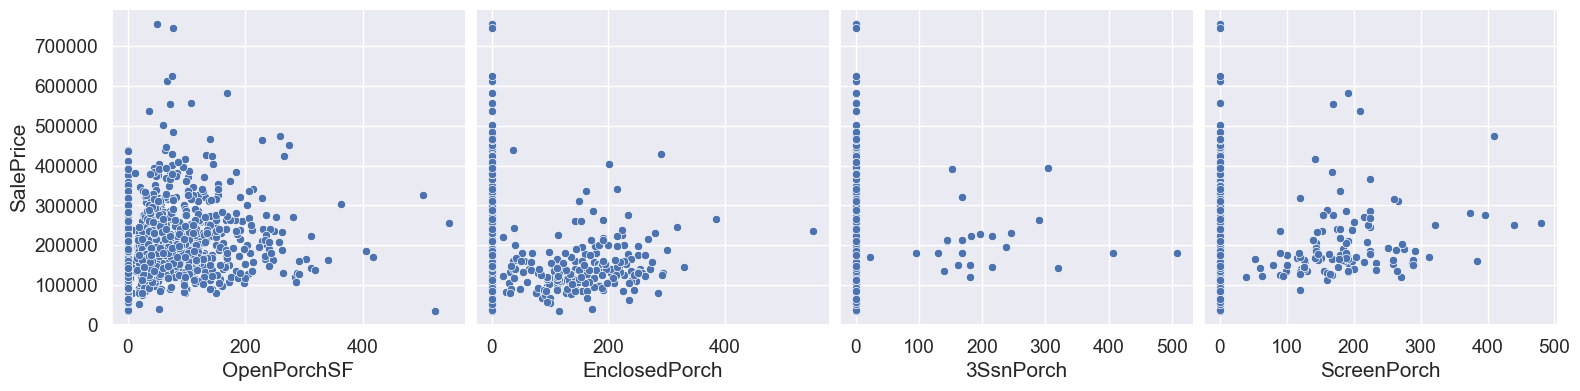

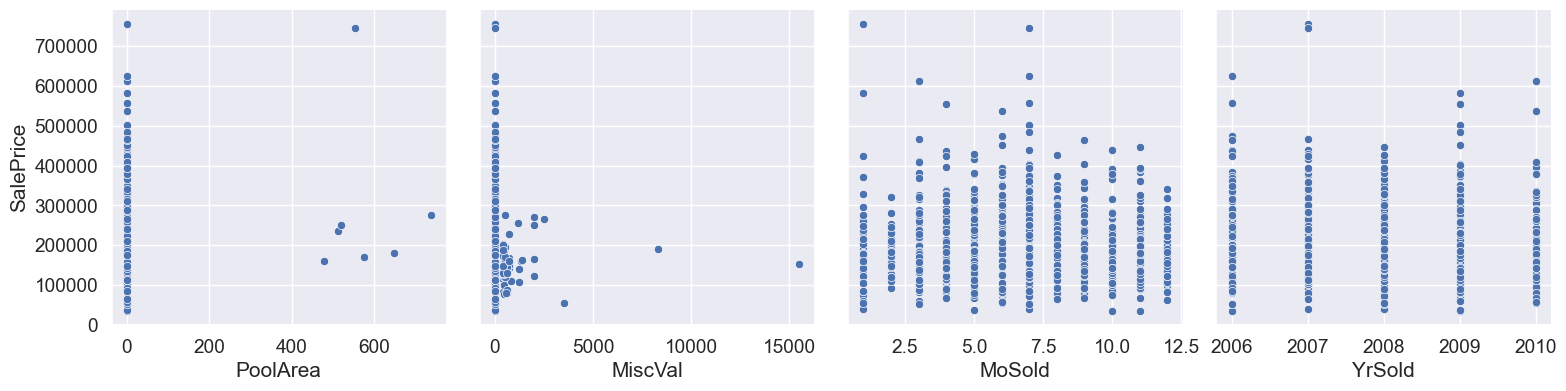

In [122]:
#function to plot scatter plot numeric variables with price

def pp(w,x,y,z):
    sns.pairplot(housing, x_vars=[w,x,y,z], y_vars='SalePrice',height=4, aspect=1, kind='scatter')
    plt.show()

pp('GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF')
pp('OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch')
pp('PoolArea','MiscVal', 'MoSold', 'YrSold')

In [123]:
# label encode ordinal features where there is order in categories

housing = housing.replace({  "Alley":        {"No_Alley_Access" : 0, "Grvl" : 1, "Pave" : 2},
                       "BsmtCond":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "BsmtExposure": {"No_Basement" : 0, "No" : 2, "Mn" : 2, "Av": 3, 
                                        "Gd" : 4},
                       "BsmtFinType1": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "CentralAir":   {"None" : 0, "N" : 1, "Y" : 2},
                       "ExterCond":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "ExterQual":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "Fence":        {"No_Fence" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv": 3, 
                                        "GdPrv" : 4},
                       "FireplaceQu":  {"No_Fireplace" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "Functional":   {"None" : 0, "Sal" : 1, "Sev" : 2, "Maj2" : 3, 
                                        "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, 
                                        "Typ" : 8},
                       "GarageCond":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageQual":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageFinish": {"No_Garage" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "HeatingQC":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "KitchenQual":  {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "LandContour":  {"None" : 0, "Low" : 1, "HLS" : 2, "Bnk" : 3, 
                                        "Lvl" : 4},
                       "LandSlope":    {"None" : 0, "Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape":     {"None" : 0, "IR3" : 1, "IR2" : 2, "IR1" : 3, 
                                        "Reg" : 4},
                       "PavedDrive":   {"None" : 0, "N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC":       {"No_Pool" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, 
                                        "Ex" : 4},
                       "Street":       {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "Utilities":    {"None" : 0, "ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, 
                                        "AllPub" : 4}}
                     )

housing.BsmtCond = housing.BsmtCond.astype(int)
housing.BsmtCond.head()

0    3
1    3
2    3
3    4
4    3
Name: BsmtCond, dtype: int64

In [124]:
# label encode ordinal features where there is order in categories

test_data = test_data.replace({  "Alley":        {"No_Alley_Access" : 0, "Grvl" : 1, "Pave" : 2},   
                       "BsmtCond":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "BsmtExposure": {"No_Basement" : 0, "No" : 2, "Mn" : 2, "Av": 3, 
                                        "Gd" : 4},
                       "BsmtFinType1": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "CentralAir":   {"None" : 0, "N" : 1, "Y" : 2},
                       "ExterCond":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "ExterQual":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "Fence":        {"No_Fence" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv": 3, 
                                        "GdPrv" : 4},
                       "FireplaceQu":  {"No_Fireplace" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "Functional":   {"None" : 0, "Sal" : 1, "Sev" : 2, "Maj2" : 3, 
                                        "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, 
                                        "Typ" : 8},
                       "GarageCond":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageQual":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageFinish": {"No_Garage" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "HeatingQC":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "KitchenQual":  {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "LandContour":  {"None" : 0, "Low" : 1, "HLS" : 2, "Bnk" : 3, 
                                        "Lvl" : 4},
                       "LandSlope":    {"None" : 0, "Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape":     {"None" : 0, "IR3" : 1, "IR2" : 2, "IR1" : 3, 
                                        "Reg" : 4},
                       "PavedDrive":   {"None" : 0, "N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC":       {"No_Pool" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, 
                                        "Ex" : 4},
                       "Street":       {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "Utilities":    {"None" : 0, "ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, 
                                        "AllPub" : 4}}
                     )

test_data.BsmtCond = test_data.BsmtCond.astype(int)
test_data.GarageQual = test_data.GarageQual.astype(int)

In [125]:
## FUNCTION TO PLOT CHARTS

def plot_charts(var1,var2,label_rotation):
    plt.figure(figsize=(12, 10))   
    plt.subplot(2,2,1)
    plt.title('Count Plot of '+ var1)
    plt1=sns.countplot(housing, x=var1, palette=("husl"))
    plt1.set(xlabel = '%s'%var1, ylabel='Count of '+ '%s'%var1)
    if(label_rotation):
        plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
        
    plt.subplot(2,2,2)
    plt.title(var1+' vs Price')
    plt2=sns.boxplot(x=housing[var1], y=housing.SalePrice, palette=("husl"))
    if(label_rotation):
        plt2.set_xticklabels(plt2.get_xticklabels(),rotation=90)
    
    plt.subplot(2,2,3)
    plt.title('Count Plot of '+ var2)
    plt3=sns.countplot(housing, x=var2, palette=("husl"))
    plt3.set(xlabel = '%s'%var2, ylabel='Count of '+ '%s'%var2)
    if(label_rotation):
        plt3.set_xticklabels(plt3.get_xticklabels(),rotation=90)
    
    plt.subplot(2,2,4)
    plt.title(var2+' vs Price')
    plt4=sns.boxplot(x=housing[var2], y=housing.SalePrice, palette=("husl"))
    if(label_rotation):
        plt4.set_xticklabels(plt4.get_xticklabels(),rotation=90)
        
    plt.show()

In [126]:
categorical_features=housing.select_dtypes(include='object')
categorical_features.columns

Index(['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'Electrical', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

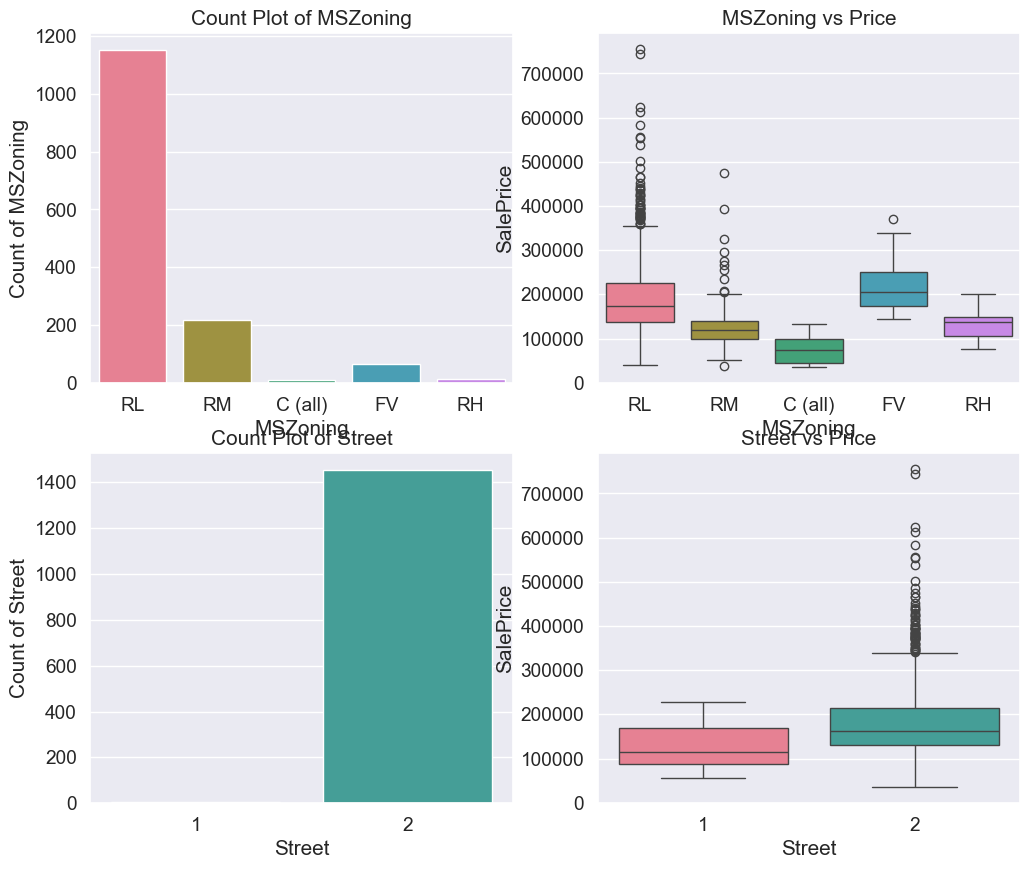

In [127]:
plot_charts('MSZoning', 'Street', label_rotation=False)

**Observation:** 
- MsZoning identifies the general zoning classification of the sale. 
- We see that the prices vary a lot for different values and most of the records are for "RL" Residential Low Density properties.
- Street identifies the Type of road access to property
- While we see that houses with Paved roads have higher Sale Price compared to Gravel, we must also note that this is a highly imbalanced variable with most records as "Pave"

In [128]:
housing['Street'].value_counts(dropna=False)

Street
2    1454
1       6
Name: count, dtype: int64

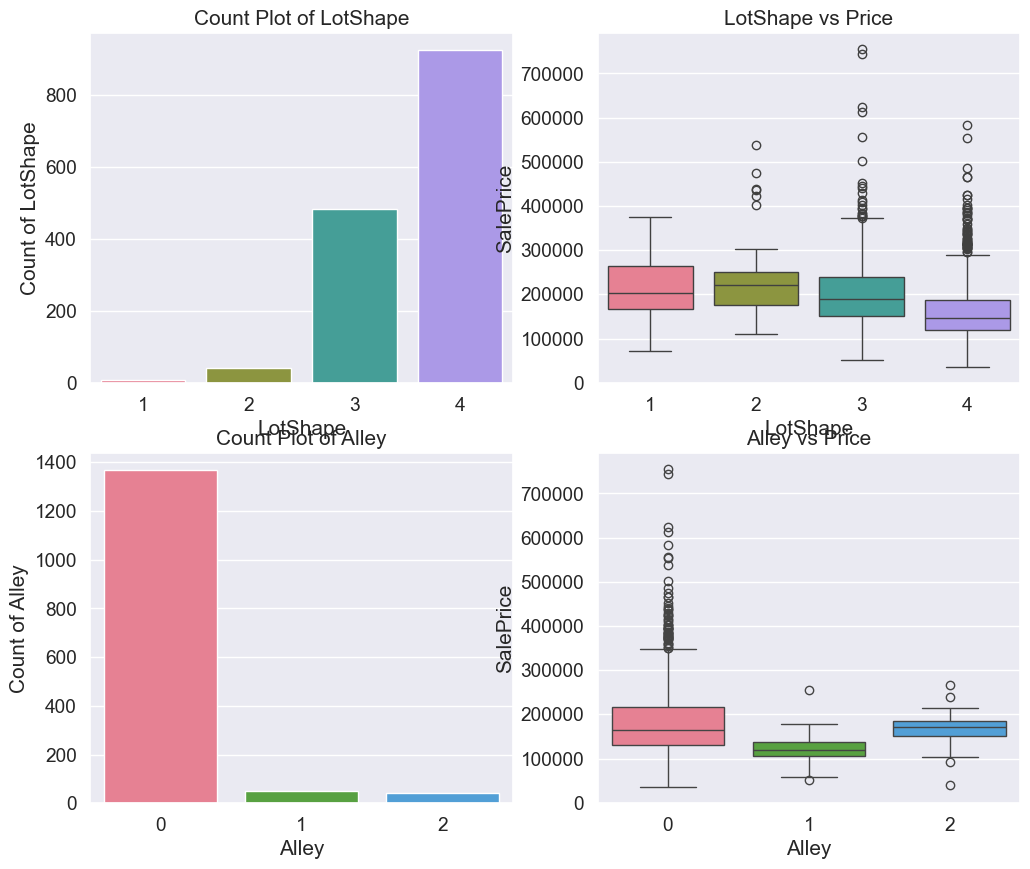

In [129]:
plot_charts('LotShape','Alley',label_rotation=False)

In [130]:
housing['Street'].value_counts(dropna=False)

Street
2    1454
1       6
Name: count, dtype: int64

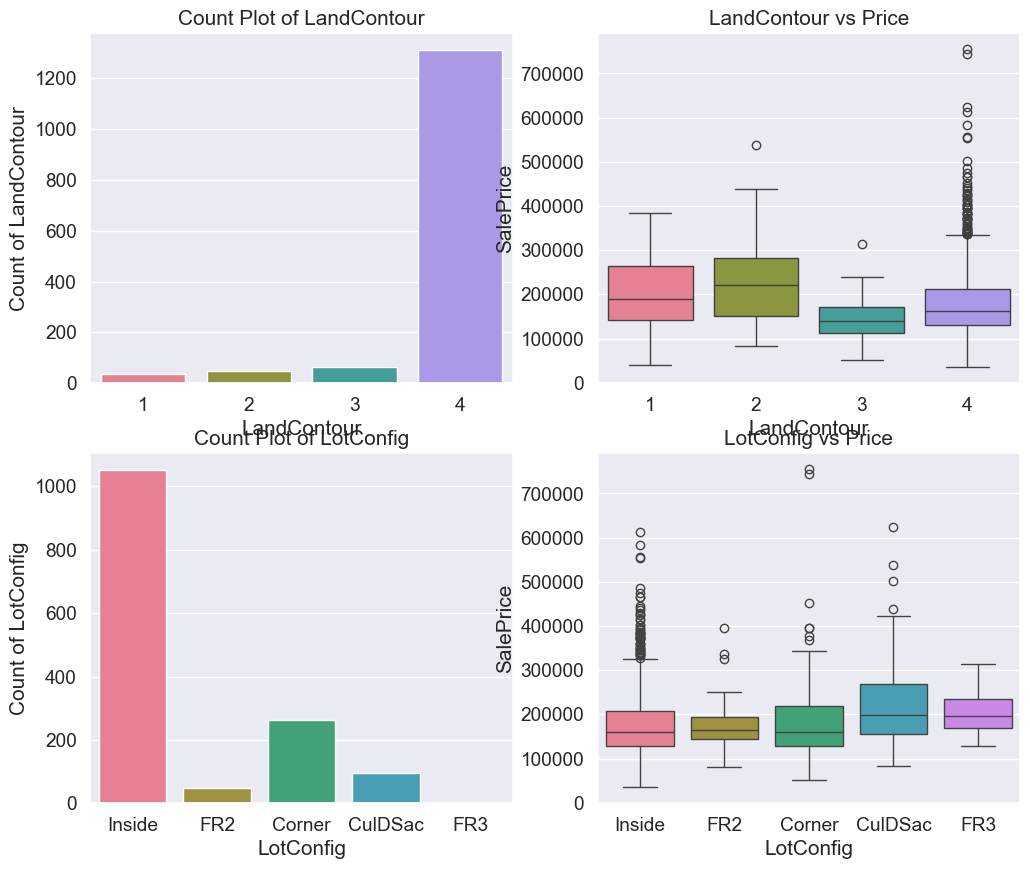

In [131]:
plot_charts('LandContour','LotConfig',label_rotation=False)

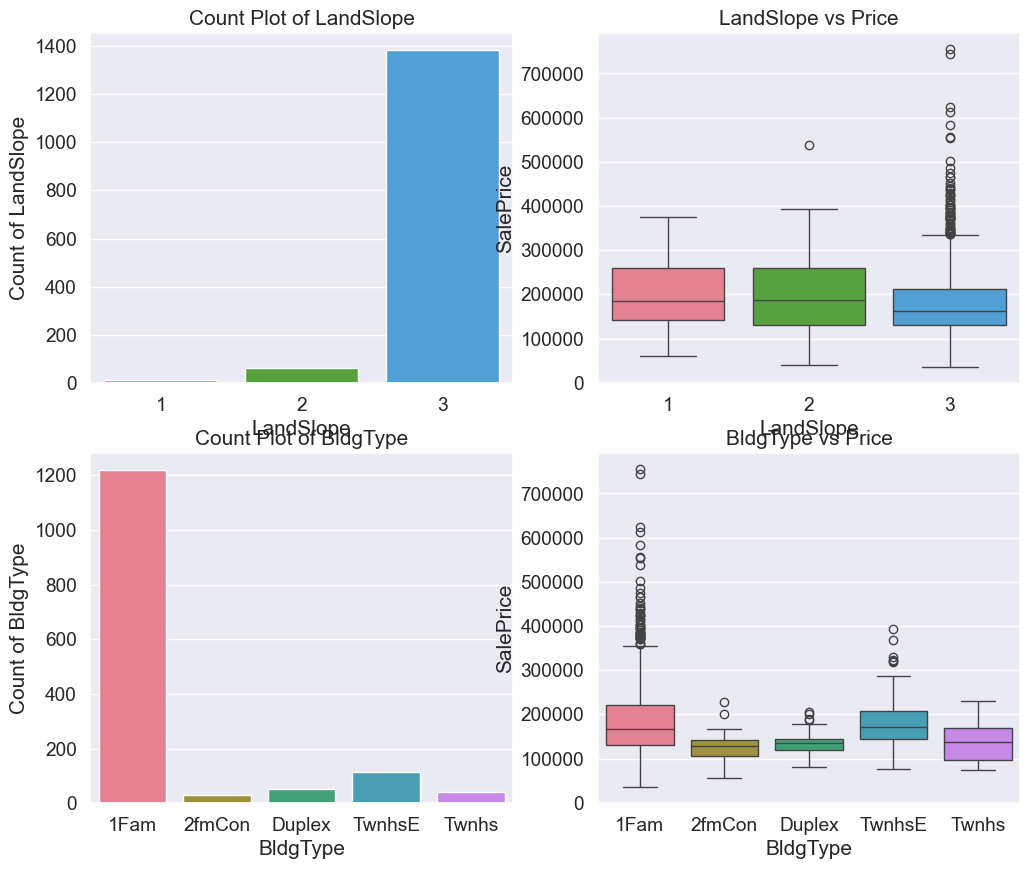

In [132]:
plot_charts('LandSlope','BldgType',label_rotation=False)

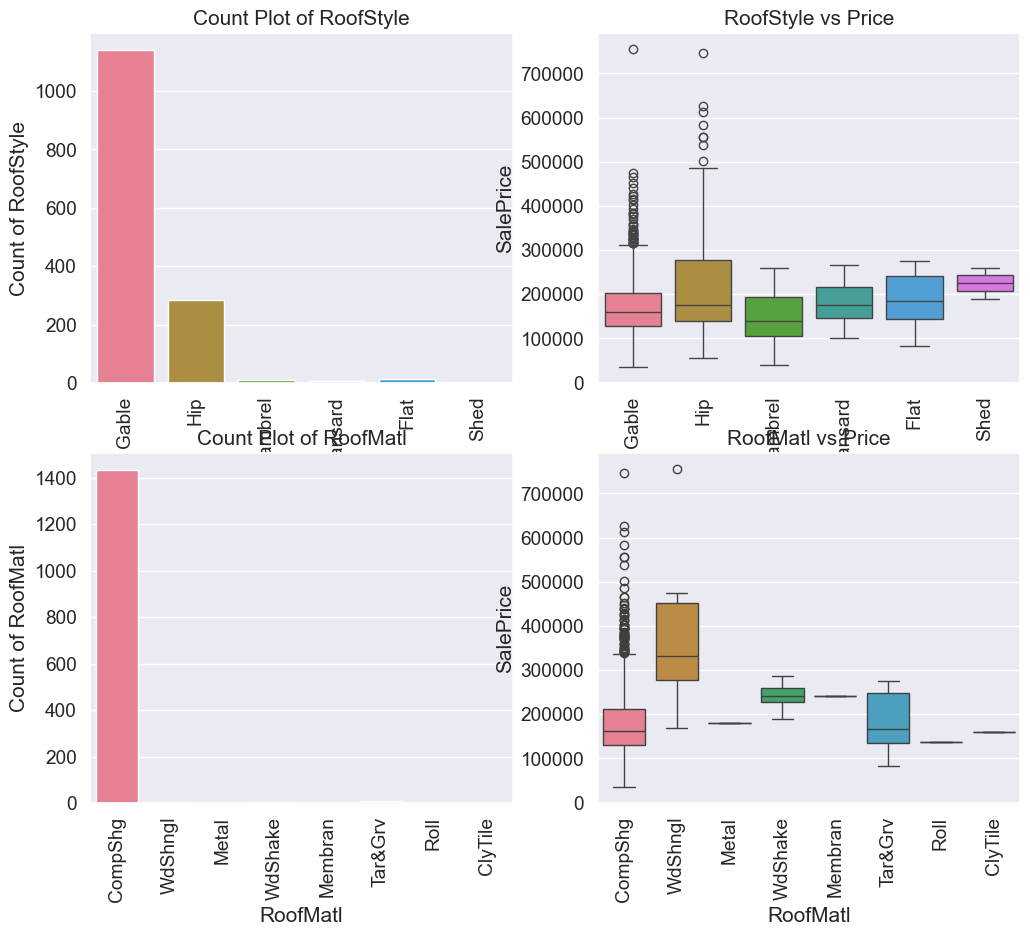

In [133]:
plot_charts('RoofStyle', 'RoofMatl',label_rotation=True)

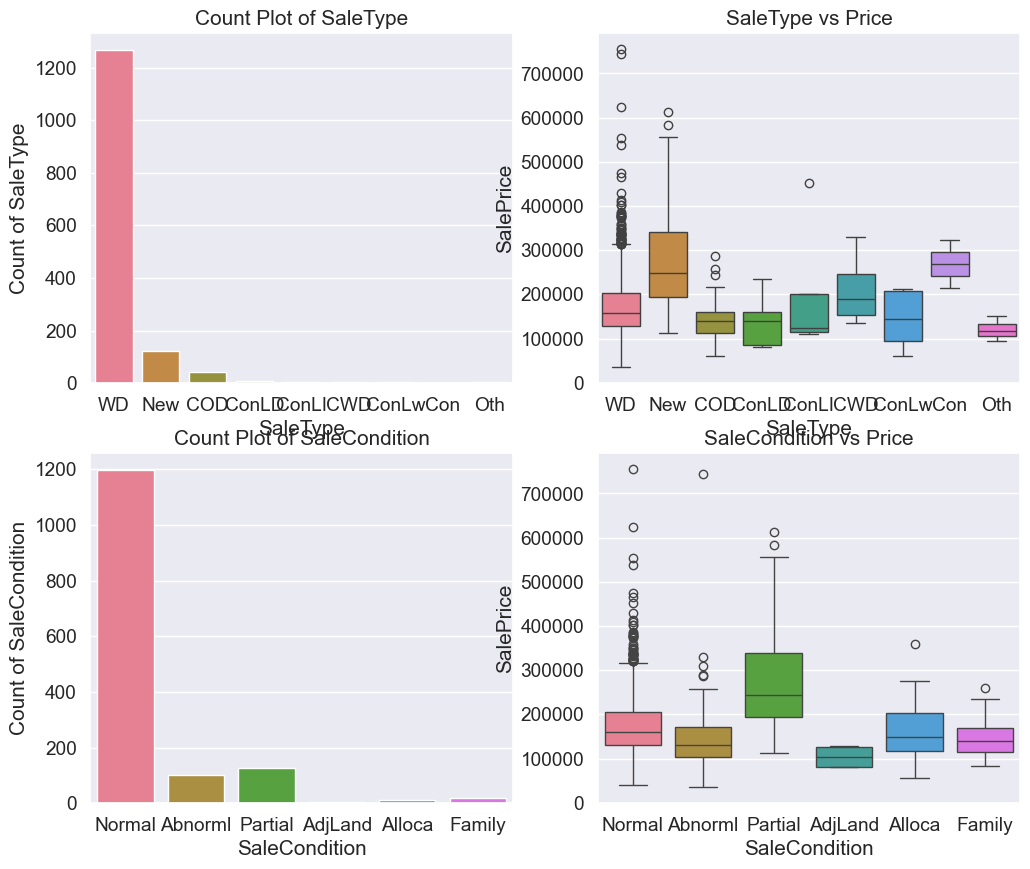

In [134]:
plot_charts('SaleType', 'SaleCondition',label_rotation=False)

In [135]:
# DATA PREPARATION

In [136]:
#changing months to categorical
import calendar

housing['MonthSold'] = housing['MoSold'].apply(lambda x: calendar.month_name[x])
housing=housing.drop(['MoSold'], axis=1)

In [137]:
#changing data type of Gararge yr built to int from float
housing['GarageYrBlt'] = housing['GarageYrBlt'].astype(int)

In [138]:
#DERIVED VARIABLES which might make more sense than year

housing['Age'] = housing['YrSold'] - housing['YearBuilt']
housing['Remod_Age'] = housing['YrSold'] - housing['YearRemodAdd']
housing['Garage_Age'] = housing['YrSold'] - housing['GarageYrBlt']
housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis=1, inplace = True)

In [139]:
numeric_data = housing.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['Id', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscVal', 'SalePrice', 'Age', 'Remod_Age', 'Garage_Age'],
      dtype='object')

In [140]:
#OUTLIER TREATMENT
def remove_outliers(dtf, numl_list):
    for j in numl_list:
        Q1 = dtf[j].quantile(0.05)
        Q3 = dtf[j].quantile(0.95)
        IQR = Q3 - Q1       
        dtf = dtf[(dtf[j] >= Q1-2.5*IQR) & (dtf[j] <= Q3+2.5*IQR)]
    return dtf

In [141]:
numeric_data_list=list(numeric_data.columns)

In [142]:
housing=remove_outliers(housing,numeric_data_list)

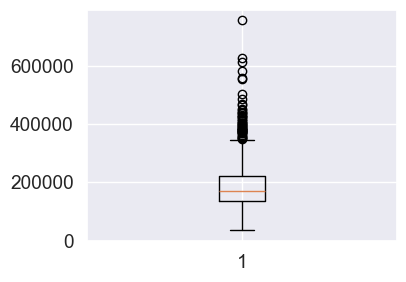

In [143]:
# Outlier treatment on the variable Sale Price
plt.figure(figsize=(4,3))
plt.boxplot(housing['SalePrice'])
plt.show()

In [144]:
housing.shape

(1158, 80)

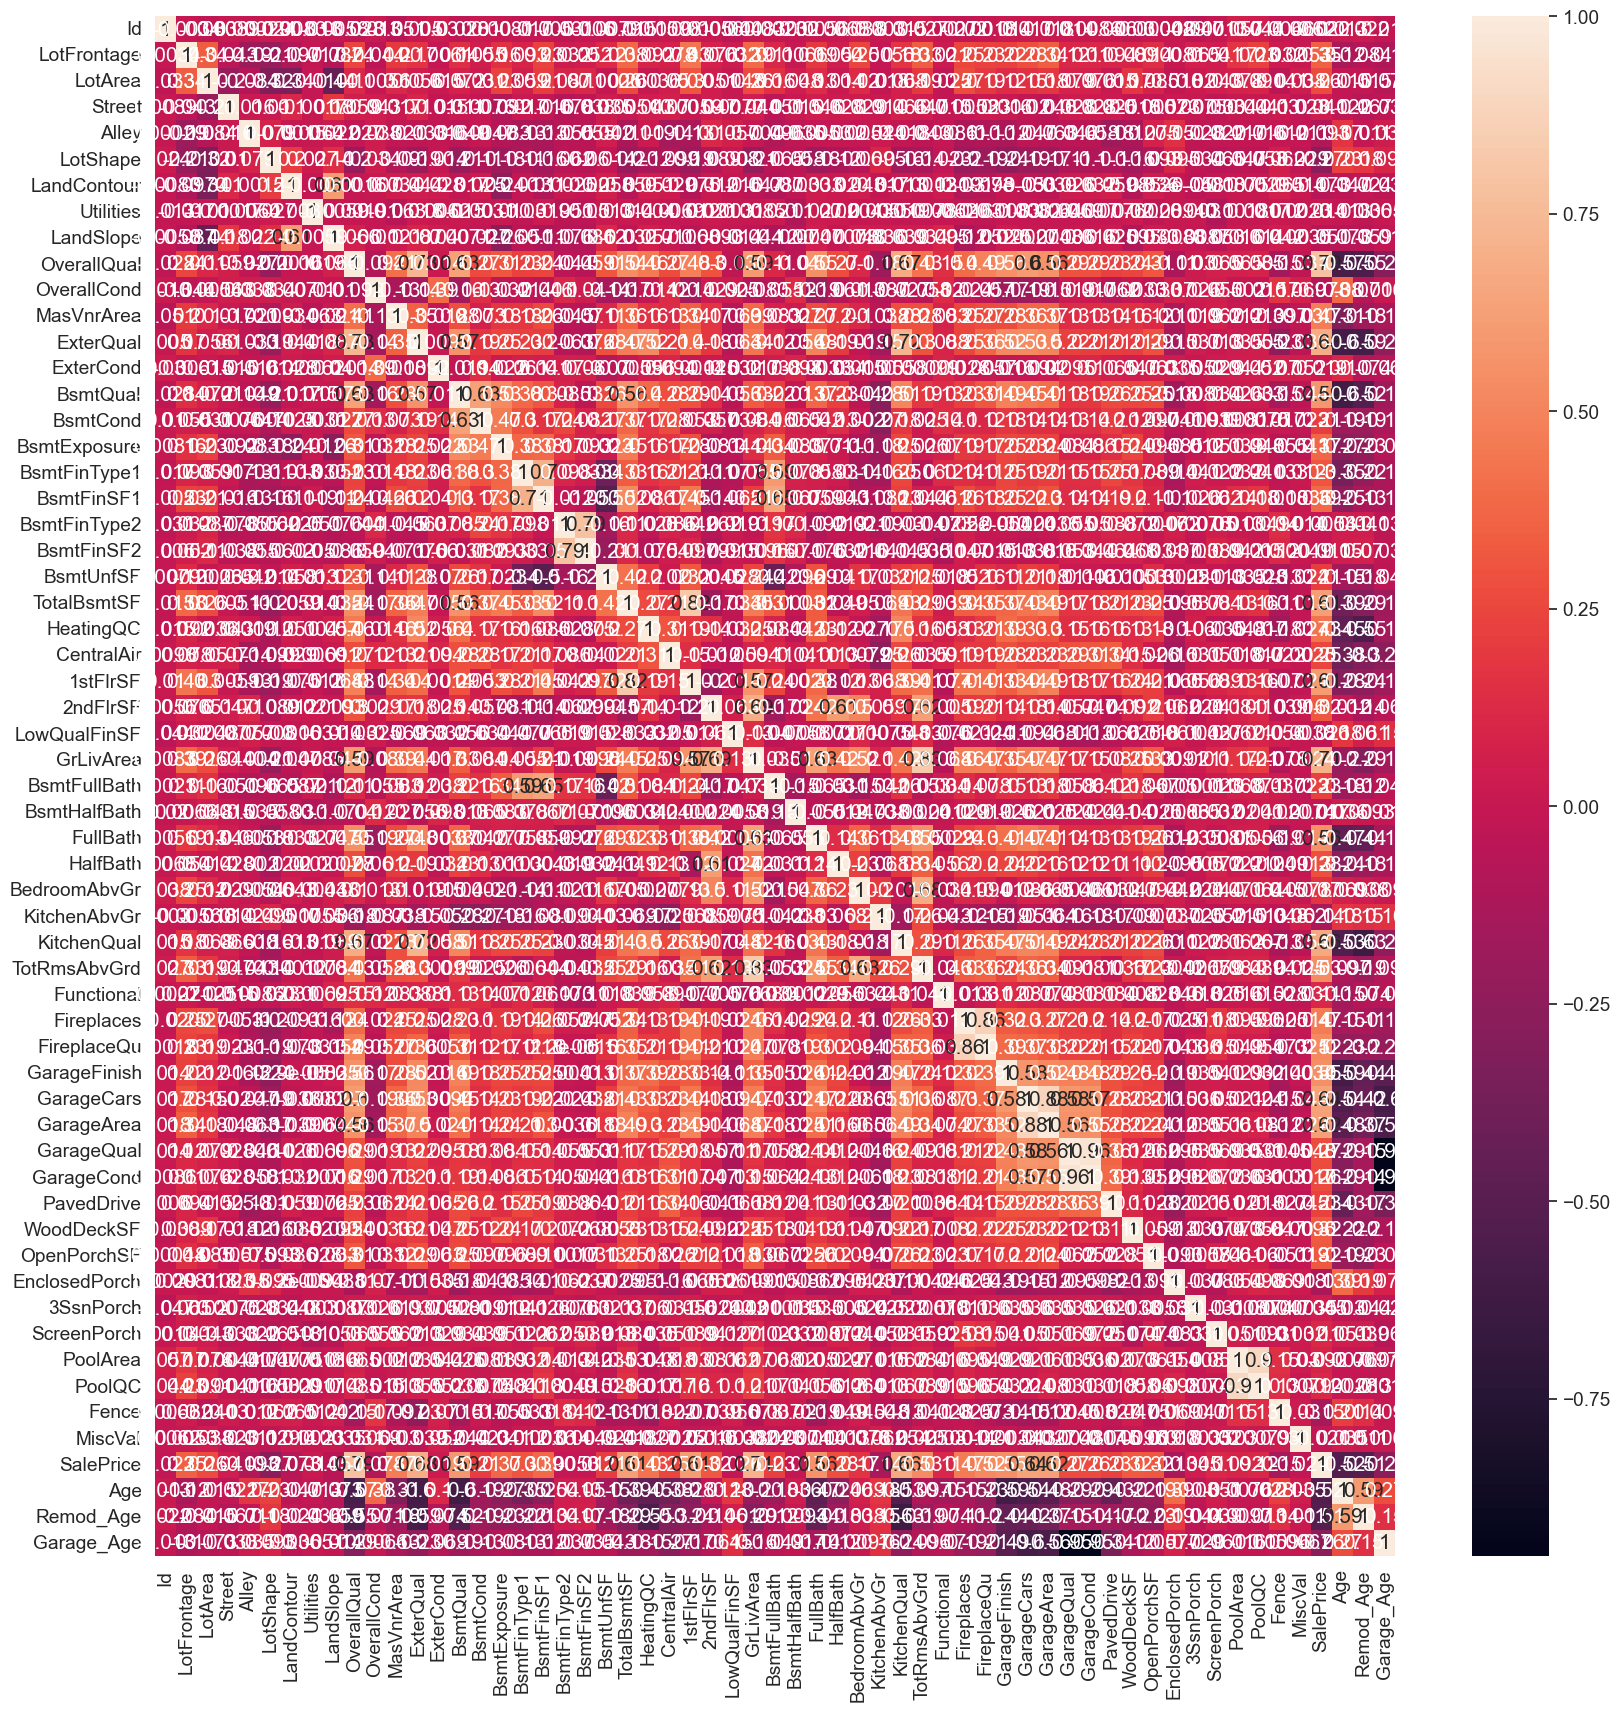

In [145]:
cor = numeric_data.corr()
plt.figure(figsize=(20,20))
#plot heatmap
sns.heatmap(cor, annot=True)
plt.show()

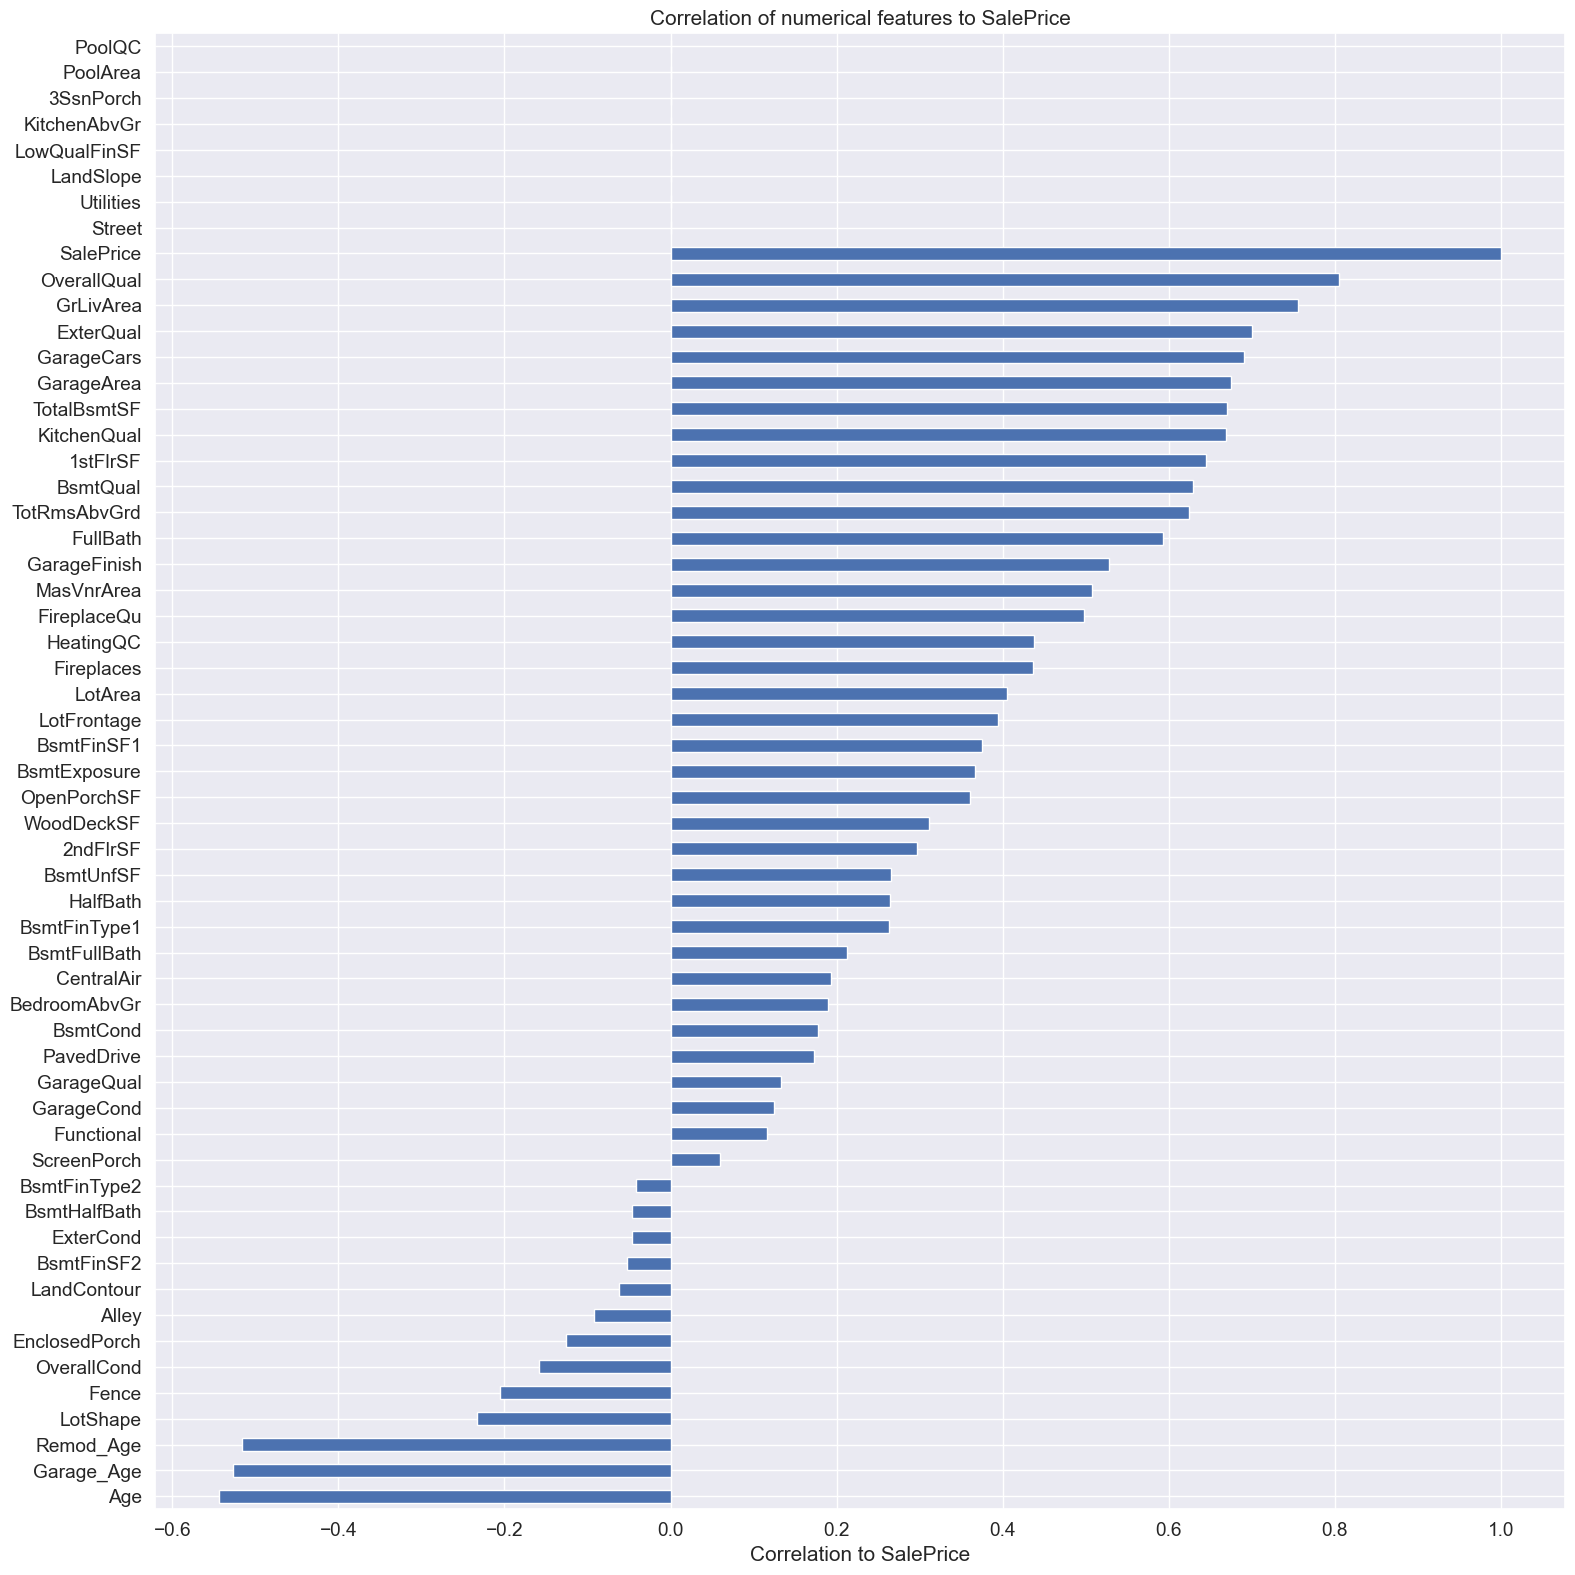

In [146]:
# we drop Id (not relevant)
corr = housing.drop(["Id"], axis=1).select_dtypes(include="number").corr()

plt.figure(figsize=(16,16));
corr["SalePrice"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to SalePrice")
plt.xlabel("Correlation to SalePrice")
plt.tight_layout()
plt.show()

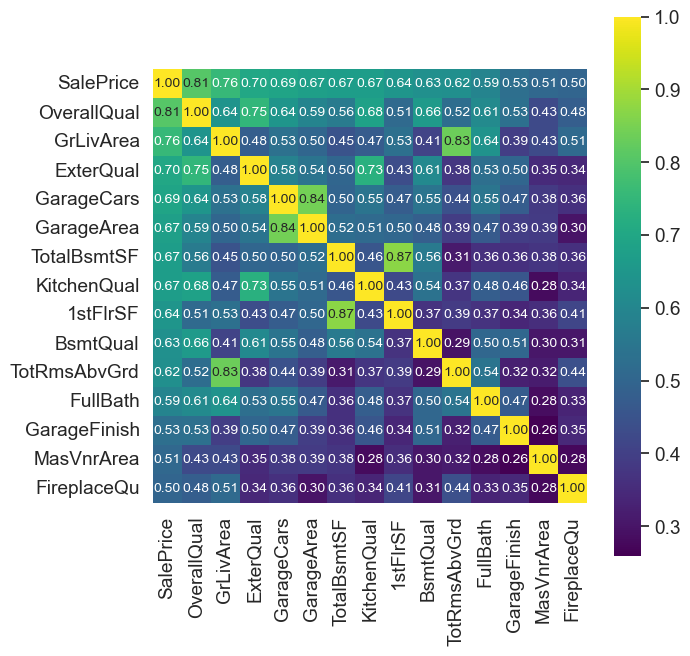

In [147]:
#saleprice correlation matrix
plt.figure(figsize=(7,7))
k = 15 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
# .T: This transposes the array, swapping rows and columns. 
# This is necessary because np.corrcoef() expects each column to represent a variable, 
# but by default, each row in the array represents a variable in pandas DataFrames.
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, cmap='viridis',yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [148]:
#converting binary variables to numeric by mapping to 0 and 1

housing['Street'] = housing['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
housing['CentralAir'] = housing['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)

In [149]:
#converting binary variables to numeric by mapping to 0 and 1

housing['PavedDrive'] = housing['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)

In [150]:
#Create a categorical data frame
df = housing.drop(['Id'],axis=1)
housing_categorical = df.select_dtypes(include=['object'])
housing_categorical.head()

MSSubClass MSZoning LotConfig Neighborhood Condition1   
0             2-STORY 1946 & NEWER       RL    Inside      CollgCr       Norm  \
1  1-STORY 1946 & NEWER ALL STYLES       RL       FR2      Veenker      Feedr   
2             2-STORY 1946 & NEWER       RL    Inside      CollgCr       Norm   
3             2-STORY 1945 & OLDER       RL    Corner      Crawfor       Norm   
4             2-STORY 1946 & NEWER       RL       FR2      NoRidge       Norm   

  Condition2 BldgType HouseStyle RoofStyle RoofMatl  ... Exterior2nd   
0       Norm     1Fam     2Story     Gable  CompShg  ...     VinylSd  \
1       Norm     1Fam     1Story     Gable  CompShg  ...     MetalSd   
2       Norm     1Fam     2Story     Gable  CompShg  ...     VinylSd   
3       Norm     1Fam     2Story     Gable  CompShg  ...     Wd Shng   
4       Norm     1Fam     2Story     Gable  CompShg  ...     VinylSd   

  MasVnrType Foundation Heating Electrical GarageType MiscFeature SaleType   
0    BrkFace      PConc    GasA      SBrkr     Attchd        None       WD  \
1       None     CBlock    GasA      SBrkr     Attchd        None       WD   
2    BrkFace      PConc    GasA      SBrkr     Attchd        None       WD   
3       None     BrkTil    GasA      SBrkr     Detchd        None       WD   
4    BrkFace      PConc    GasA      SBrkr     Attchd        None       WD   

  SaleCondition  MonthSold  
0        Normal   February  
1        Normal        May  
2        Normal  September  
3       Abnorml   February  
4        Normal   December  

[5 rows x 21 columns]

In [151]:
# convert into dummies
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True, dtype=int)
housing_dummies.head()

MSSubClass_1-1/2 STORY FINISHED ALL AGES  MSSubClass_1-STORY 1945 & OLDER   
0                                         0                                0  \
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         0                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES   
0                                           0  \
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER   
0                                                  0                 \
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES   
0                                             0  \
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES   
0                                                  0     \
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER   
0                                0                                0  \
1                                0                                0   
2                                0                                0   
3                                0                                1   
4                                0                                0   

   MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER   
0                                1                                      0  \
1                                0                                      0   
2                                1                                      0   
3                                0                                      0   
4                                1                                      0   

   ...  MonthSold_December  MonthSold_February  MonthSold_January   
0  ...                   0                   1                  0  \
1  ...                   0                   0                  0   
2  ...                   0                   0                  0   
3  ...                   0                   1                  0   
4  ...                   1                   0                  0   

   MonthSold_July  MonthSold_June  MonthSold_March  MonthSold_May   
0               0               0                0              0  \
1               0               0                0              1   
2               0               0                0              0   
3               0               0                0              0   
4               0               0                0              0   

   MonthSold_November  MonthSold_October  MonthSold_September  
0                   0                  0                    0  
1                   0                  0                    0  
2                   0                  0                    1  
3                   0                  0                    0  
4                   0                  0                    0  

[5 rows x 150 columns]

In [152]:
#dropping original categorical columns
df = df.drop(list(housing_categorical.columns), axis=1)

In [153]:
#concatenating dummy columns to original dataframe
df = pd.concat([df,housing_dummies], axis=1)

In [154]:
df.shape

(1158, 208)

In [155]:
#train_test_split
df_train,df_test= train_test_split(df, train_size=0.7, random_state=100)
df_train.shape

(810, 208)

In [156]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice", axis=1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice", axis=1)

below are test data chunks

In [157]:
## "MSSubClass" is a numeric column but it should actually be categorical as per the data dictionary, so let's convert that.

test_data=test_data.replace({'MSSubClass' : { 20 : '1-STORY 1946 & NEWER ALL STYLES', 
                                          30:'1-STORY 1945 & OLDER',
                                          40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                          45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                          50:'1-1/2 STORY FINISHED ALL AGES',
                                          60:'2-STORY 1946 & NEWER',
                                          70:'2-STORY 1945 & OLDER',
                                          75:'2-1/2 STORY ALL AGES',
                                          80:'SPLIT OR MULTI-LEVEL',
                                          85:'SPLIT FOYER',
                                          90:'DUPLEX - ALL STYLES AND AGES',
                                         120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                         150:'1-1/2 STORY PUD - ALL AGES',
                                         160:'2-STORY PUD - 1946 & NEWER',
                                         180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                         190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}})

#changing months to categorical
import calendar

test_data['MonthSold'] = test_data['MoSold'].apply(lambda x: calendar.month_name[x])
test_data=test_data.drop(['MoSold'], axis=1)

#changing data type of Gararge yr built to int from float
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].astype(int)

#DERIVED VARIABLES which might make more sense than year
test_data['Age'] = test_data['YrSold'] - test_data['YearBuilt']
test_data['Remod_Age'] = test_data['YrSold'] - test_data['YearRemodAdd']
test_data['Garage_Age'] = test_data['YrSold'] - test_data['GarageYrBlt']
test_data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis=1, inplace = True)

#converting binary variables to numeric by mapping to 0 and 1
test_data['Street'] = test_data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
test_data['CentralAir'] = test_data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)

#converting binary variables to numeric by mapping to 0 and 1
test_data['PavedDrive'] = test_data['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)
test_data.shape

(1459, 79)

In [158]:
test_data_X=test_data.drop('Id', axis=1)
test_data_numerical=test_data_X.select_dtypes(include=['int32','int64','float64']).columns
test_data_numerical

Index(['LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'Age',
       'Remod_Age', 'Garage_Age'],
      dtype='object')

In [159]:
test_data_categorical = test_data_X.select_dtypes(include=['object'])
test_data_categorical.head()

MSSubClass MSZoning LotConfig   
0                    1-STORY 1946 & NEWER ALL STYLES       RH    Inside  \
1                    1-STORY 1946 & NEWER ALL STYLES       RL    Corner   
2                               2-STORY 1946 & NEWER       RL    Inside   
3                               2-STORY 1946 & NEWER       RL    Inside   
4  1-STORY PUD (Planned Unit Development) - 1946 ...       RL    Inside   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl   
0        NAmes      Feedr       Norm     1Fam     1Story     Gable  CompShg  \
1        NAmes       Norm       Norm     1Fam     1Story       Hip  CompShg   
2      Gilbert       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Gilbert       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      StoneBr       Norm       Norm   TwnhsE     1Story     Gable  CompShg   

   ... Exterior2nd MasVnrType Foundation Heating Electrical GarageType   
0  ...     VinylSd       None     CBlock    GasA      SBrkr     Attchd  \
1  ...     Wd Sdng    BrkFace     CBlock    GasA      SBrkr     Attchd   
2  ...     VinylSd       None      PConc    GasA      SBrkr     Attchd   
3  ...     VinylSd    BrkFace      PConc    GasA      SBrkr     Attchd   
4  ...     HdBoard       None      PConc    GasA      SBrkr     Attchd   

  MiscFeature SaleType SaleCondition MonthSold  
0        None       WD        Normal      June  
1        Gar2       WD        Normal      June  
2        None       WD        Normal     March  
3        None       WD        Normal      June  
4        None       WD        Normal   January  

[5 rows x 21 columns]

In [160]:
# convert into dummies
test_data_dummies = pd.get_dummies(test_data_categorical, drop_first=True, dtype=int)
test_data_dummies.head()

MSSubClass_1-1/2 STORY FINISHED ALL AGES   
0                                         0  \
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   MSSubClass_1-1/2 STORY PUD - ALL AGES  MSSubClass_1-STORY 1945 & OLDER   
0                                      0                                0  \
1                                      0                                0   
2                                      0                                0   
3                                      0                                0   
4                                      0                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES   
0                                           1  \
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER   
0                                                  0                 \
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  1                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES   
0                                             0  \
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES   
0                                                  0     \
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER   
0                                0                                0  \
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   MSSubClass_2-STORY 1946 & NEWER  ...  MonthSold_December   
0                                0  ...                   0  \
1                                0  ...                   0   
2                                1  ...                   0   
3                                1  ...                   0   
4                                0  ...                   0   

   MonthSold_February  MonthSold_January  MonthSold_July  MonthSold_June   
0                   0                  0               0               1  \
1                   0                  0               0               1   
2                   0                  0               0               0   
3                   0                  0               0               1   
4                   0                  1               0               0   

   MonthSold_March  MonthSold_May  MonthSold_November  MonthSold_October   
0                0              0                   0                  0  \
1                0              0                   0                  0   
2                1              0                   0                  0   
3                0              0                   0                  0   
4                0              0                   0                  0   

   MonthSold_September  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5

In [161]:
#dropping original categorical columns
df_test = test_data_X.drop(list(test_data_categorical.columns), axis=1)

#concatenating dummy columns to original dataframe
df_test = pd.concat([df_test,test_data_dummies], axis=1)
df_test.shape

(1459, 207)

In [162]:
X_train.shape

(810, 207)

In [163]:
X_train, df_test = X_train.align(df_test, join="right", axis=1)
X_test, df_test = X_test.align(df_test, join="right", axis=1)

above are test data chunk

In [164]:
df_missing=pd.DataFrame((round(100*(X_train.isnull().sum()/len(X_train.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

missing
MiscFeature_None                         100.0
Condition2_Feedr                         100.0
MiscFeature_Othr                         100.0
GarageType_Attchd                        100.0
Exterior1st_AsphShn                      100.0
GarageType_No_Garage                     100.0
RoofStyle_Shed                           100.0
MSSubClass_1-1/2 STORY PUD - ALL AGES    100.0
Exterior2nd_Brk Cmn                        0.0
Exterior1st_CBlock                         0.0
Exterior2nd_HdBoard                        0.0
RoofMatl_Tar&Grv                           0.0
RoofMatl_WdShake                           0.0
RoofMatl_WdShngl                           0.0
Exterior2nd_CmentBd                        0.0
Exterior1st_BrkComm                        0.0
Exterior1st_BrkFace                        0.0
Exterior1st_CemntBd                        0.0
Exterior2nd_BrkFace                        0.0
Exterior1st_HdBoard                        0.0

In [165]:
catgl_feats = X_train.dtypes[X_train.dtypes == 'object'].index
numrl_feats = X_train.dtypes[X_train.dtypes != 'object'].index

Nan_cols = []

cols = X_train.columns
for i in cols:
    if (X_train[i].isnull().sum()/len(X_train))*100 > 0:
        Nan_cols.append(i)

cat_treat_list = []
num_treat_list = []

for i in Nan_cols:
    if i in catgl_feats:
        cat_treat_list.append(i)
    else:
        num_treat_list.append(i)

for i in cat_treat_list:
    X_train[i].fillna(X_train[i].mode()[0], inplace = True)

for i in num_treat_list:
    X_train[i].fillna(0, inplace = True)

df_missing=pd.DataFrame((round(100*(X_train.isnull().sum()/len(X_train.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

missing
LotFrontage              0.0
Exterior1st_Stucco       0.0
RoofMatl_WdShake         0.0
RoofMatl_WdShngl         0.0
Exterior1st_AsphShn      0.0
Exterior1st_BrkComm      0.0
Exterior1st_BrkFace      0.0
Exterior1st_CBlock       0.0
Exterior1st_CemntBd      0.0
Exterior1st_HdBoard      0.0
Exterior1st_MetalSd      0.0
Exterior1st_Plywood      0.0
Exterior1st_VinylSd      0.0
RoofStyle_Shed           0.0
Exterior1st_Wd Sdng      0.0
Exterior1st_WdShing      0.0
Exterior2nd_AsphShn      0.0
Exterior2nd_Brk Cmn      0.0
Exterior2nd_BrkFace      0.0
Exterior2nd_CBlock       0.0

In [166]:
df_missing=pd.DataFrame((round(100*(X_test.isnull().sum()/len(X_test.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

missing
MiscFeature_None                         100.0
Condition2_Feedr                         100.0
MiscFeature_Othr                         100.0
GarageType_Attchd                        100.0
Exterior1st_AsphShn                      100.0
GarageType_No_Garage                     100.0
RoofStyle_Shed                           100.0
MSSubClass_1-1/2 STORY PUD - ALL AGES    100.0
Exterior2nd_Brk Cmn                        0.0
Exterior1st_CBlock                         0.0
Exterior2nd_HdBoard                        0.0
RoofMatl_Tar&Grv                           0.0
RoofMatl_WdShake                           0.0
RoofMatl_WdShngl                           0.0
Exterior2nd_CmentBd                        0.0
Exterior1st_BrkComm                        0.0
Exterior1st_BrkFace                        0.0
Exterior1st_CemntBd                        0.0
Exterior2nd_BrkFace                        0.0
Exterior1st_HdBoard                        0.0

In [167]:
catgl_feats = X_test.dtypes[X_test.dtypes == 'object'].index
numrl_feats = X_test.dtypes[X_test.dtypes != 'object'].index

Nan_cols = []

cols = X_test.columns
for i in cols:
    if (X_test[i].isnull().sum()/len(X_test))*100 > 0:
        Nan_cols.append(i)

cat_treat_list = []
num_treat_list = []

for i in Nan_cols:
    if i in catgl_feats:
        cat_treat_list.append(i)
    else:
        num_treat_list.append(i)

for i in cat_treat_list:
    X_test[i].fillna(X_test[i].mode()[0], inplace = True)

for i in num_treat_list:
    X_test[i].fillna(0, inplace = True)

df_missing=pd.DataFrame((round(100*(X_test.isnull().sum()/len(X_test.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

missing
LotFrontage              0.0
Exterior1st_Stucco       0.0
RoofMatl_WdShake         0.0
RoofMatl_WdShngl         0.0
Exterior1st_AsphShn      0.0
Exterior1st_BrkComm      0.0
Exterior1st_BrkFace      0.0
Exterior1st_CBlock       0.0
Exterior1st_CemntBd      0.0
Exterior1st_HdBoard      0.0
Exterior1st_MetalSd      0.0
Exterior1st_Plywood      0.0
Exterior1st_VinylSd      0.0
RoofStyle_Shed           0.0
Exterior1st_Wd Sdng      0.0
Exterior1st_WdShing      0.0
Exterior2nd_AsphShn      0.0
Exterior2nd_Brk Cmn      0.0
Exterior2nd_BrkFace      0.0
Exterior2nd_CBlock       0.0

In [168]:
num_vars = X_train.select_dtypes(include=["int64", "float64"]).columns

In [169]:
num_vars

Index(['LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond',
       ...
       'MonthSold_December', 'MonthSold_February', 'MonthSold_January',
       'MonthSold_July', 'MonthSold_June', 'MonthSold_March', 'MonthSold_May',
       'MonthSold_November', 'MonthSold_October', 'MonthSold_September'],
      dtype='object', length=207)

In [170]:
scaler = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [171]:
#linear regression model

In [172]:
lm=LinearRegression()
lm.fit(X_train,y_train)

#recursive feature elimination! -- Important to discuss
rfe = RFE(estimator=lm, n_features_to_select=20)
rfe=rfe.fit(X_train,y_train)

col=X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'Age',
       'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
       'MSSubClass_2-1/2 STORY ALL AGES',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES', 'BldgType_2fmCon',
       'BldgType_Duplex', 'HouseStyle_2.5Unf', 'MiscFeature_Shed',
       'SaleType_Oth'],
      dtype='object')

In [173]:
X_train_new=X_train[col]

X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     391.5
Date:                Wed, 27 Mar 2024   Prob (F-statistic):          4.94e-324
Time:                        23:27:08   Log-Likelihood:                 456.55
No. Observations:                 810   AIC:                            -887.1
Df Residuals:                     797   BIC:                            -826.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   12.0559      0.005   2471.467      0.000      12.046      12.065
OverallQual                                              0.1226      0.008     15.075      0.000       0.107       0.139
OverallCond                                              0.0586      0.006     10.450      0.000       0.048       0.070
BsmtFinSF1                                               0.0370      0.004      8.235      0.000       0.028       0.046
BsmtFinSF2                                               0.0119      0.005      2.439      0.015       0.002       0.021
BsmtUnfSF                                                0.0026      0.004      0.589      0.556      -0.006       0.011
TotalBsmtSF                                              0.0468      0.008      6.190      0.000       0.032       0.062
CentralAir                                            1.059e-17    1.3e-18      8.160      0.000    8.04e-18    1.31e-17
1stFlrSF                                                 0.0501      0.007      6.717      0.000       0.035       0.065
2ndFlrSF                                                 0.0478      0.005     10.355      0.000       0.039       0.057
LowQualFinSF                                         -1.033e-17   8.27e-19    -12.480      0.000   -1.19e-17    -8.7e-18
GrLivArea                                                0.0808      0.004     18.893      0.000       0.072       0.089
Age                                                     -0.1088      0.007    -15.437      0.000      -0.123      -0.095
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES     0.0010      0.002      0.397      0.691      -0.004       0.006
MSSubClass_2-1/2 STORY ALL AGES                         -0.0009      0.003     -0.340      0.734      -0.006       0.004
MSSubClass_DUPLEX - ALL STYLES AND AGES                 -0.0014      0.002     -0.576      0.565      -0.006       0.003
BldgType_2fmCon                                          0.0010      0.002      0.397      0.691      -0.004       0.006
BldgType_Duplex                                         -0.0014      0.002     -0.576      0.565      -0.006       0.003
HouseStyle_2.5Unf                                       -0.0009      0.003     -0.340      0.734      -0.006       0.004
MiscFeature_Shed                                         0.0018      0.002      0.751      0.453      -0.003       0.007
SaleType_Oth                                             0.0018      0.002      0.751      0.453      -0.003       0.007
==============================================================================
Omnibus:                      607.771   Durbin-Watson:                   2.119
Prob(Omnibus):       

# Ridge regularisation

Ridge regularisation is a simple method to make sure you don't overfit your data. 
- A form of L2 regularisation
- One term is focused on fitting the data well, and the second term is focused on minimizing the loss
- Ridge regression penalises the square of the sum of the weights
- As such we expect absolute values of weights and ability to penalise extreme values

In [174]:
#RIDGE REGULARIZATION

# list of alphas to tune


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
            max_iter=None, random_state=None,
            solver='auto', tol=0.001)

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(tol=0.001),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [175]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 100}
-0.07747591190192901


In [176]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha   
0        0.014026      0.001534         0.006018        0.001223      0.0001  \
1        0.012217      0.000537         0.005106        0.000208       0.001   
2        0.012829      0.000732         0.005503        0.000348        0.01   
3        0.012349      0.000470         0.005203        0.000235        0.05   
4        0.012194      0.000254         0.005037        0.000216         0.1   
5        0.012091      0.000260         0.005146        0.000303         0.2   
6        0.011876      0.000309         0.005279        0.000342         0.3   
7        0.011969      0.000221         0.005130        0.000238         0.4   
8        0.012186      0.000412         0.005159        0.000168         0.5   
9        0.012146      0.000230         0.005229        0.000309         0.6   
10       0.012857      0.000622         0.005408        0.000303         0.7   
11       0.035871      0.029225         0.012387        0.008474         0.8   
12       0.013454      0.000537         0.005627        0.000338         0.9   
13       0.013179      0.000423         0.005670        0.000183         1.0   
14       0.013481      0.000142         0.005593        0.000133         2.0   
15       0.013280      0.000232         0.005403        0.000119         3.0   
16       0.013175      0.000138         0.005436        0.000223         4.0   
17       0.013383      0.000164         0.005595        0.000148         5.0   
18       0.013222      0.000182         0.005386        0.000177         6.0   
19       0.013695      0.000125         0.005899        0.000280         7.0   
20       0.013563      0.000210         0.005575        0.000109         8.0   
21       0.013851      0.000195         0.005737        0.000153         9.0   
22       0.013527      0.000306         0.005972        0.000272        10.0   
23       0.013771      0.000564         0.005618        0.000155          20   
24       0.013683      0.000396         0.005729        0.000209          50   
25       0.013694      0.000246         0.006003        0.000133         100   

               params  split0_test_score  split1_test_score   
0   {'alpha': 0.0001}          -0.082862          -0.085341  \
1    {'alpha': 0.001}          -0.082848          -0.085331   
2     {'alpha': 0.01}          -0.082710          -0.085234   
3     {'alpha': 0.05}          -0.082181          -0.084844   
4      {'alpha': 0.1}          -0.081661          -0.084431   
5      {'alpha': 0.2}          -0.080915          -0.083788   
6      {'alpha': 0.3}          -0.080411          -0.083283   
7      {'alpha': 0.4}          -0.080040          -0.082860   
8      {'alpha': 0.5}          -0.079752          -0.082498   
9      {'alpha': 0.6}          -0.079519          -0.082189   
10     {'alpha': 0.7}          -0.079326          -0.081937   
11     {'alpha': 0.8}          -0.079165          -0.081751   
12     {'alpha': 0.9}          -0.079027          -0.081578   
13     {'alpha': 1.0}          -0.078904          -0.081417   
14     {'alpha': 2.0}          -0.078549          -0.080221   
15     {'alpha': 3.0}          -0.078523          -0.079434   
16     {'alpha': 4.0}          -0.078475          -0.079138   
17     {'alpha': 5.0}          -0.078449          -0.079139   
18     {'alpha': 6.0}          -0.078451          -0.079116   
19     {'alpha': 7.0}          -0.078430          -0.079087   
20     {'alpha': 8.0}          -0.078407          -0.079050   
21     {'alpha': 9.0}          -0.078400          -0.079006   
22    {'alpha': 10.0}          -0.078389          -0.078959   
23      {'alpha': 20}          -0.077914          -0.078487   
24      {'alpha': 50}          -0.076333          -0.077974   
25     {'alpha': 100}          -0.074863          -0.078115   

    split2_test_score  split3_test_score  ...  mean_test_score   
0           -0.082393          -0.087356  ...        -0.082649  \
1        

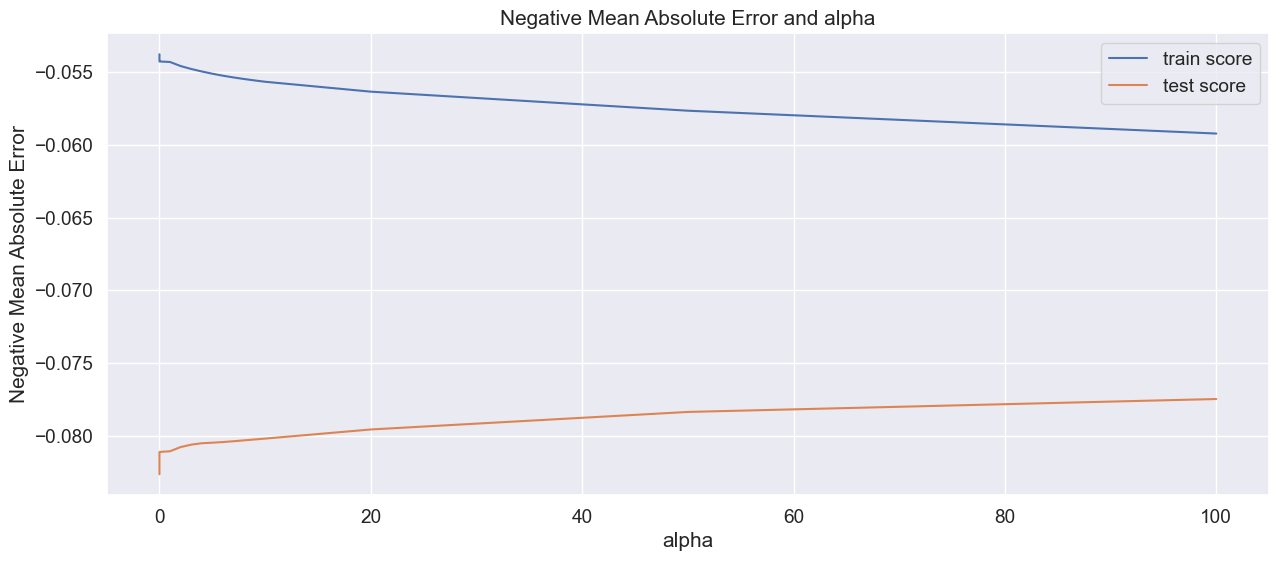

In [177]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(15,6))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [178]:
#final ridge model
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 9.93471383e-03,  1.51847790e-02,  0.00000000e+00,  7.30216729e-03,
       -3.06320794e-03,  5.05099581e-05,  0.00000000e+00,  0.00000000e+00,
        4.61252103e-02,  2.87169841e-02,  1.20116468e-02,  6.15914072e-03,
       -1.05118986e-02,  1.29261925e-02, -3.24162743e-04,  1.07034611e-02,
        1.32548493e-02,  2.35761677e-02,  9.35389860e-04,  3.09449150e-03,
        4.71435722e-04,  2.66985180e-02,  1.19297358e-02,  0.00000000e+00,
        2.77720485e-02,  1.62624649e-02,  0.00000000e+00,  3.57709056e-02,
        8.96533107e-03,  4.06381552e-03,  1.62873313e-02,  1.24083387e-02,
        9.35117914e-03,  0.00000000e+00,  1.46244760e-02,  1.78566258e-02,
        7.18022008e-03,  1.38738330e-02,  4.21183433e-03,  5.96943180e-03,
        1.46603332e-02,  2.29882865e-02,  1.03487482e-02, -4.27212633e-03,
        0.00000000e+00,  1.12900029e-02,  9.57521844e-03,  1.54500465e-03,
        0.00000000e+00,  1.13584060e-02,  0.00000000e+00,  0.00000000e+00,
        6.02622089e-04,  

In [179]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9377489761354317


In [180]:
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9102261472544044


In [181]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.015102779785604085


In [182]:
# Ridge model parameters
model_parameters_1 = list(ridge.coef_)
model_parameters_1.insert(0, ridge.intercept_)
model_parameters_1 = [round(x, 3) for x in model_parameters_1]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_1))

[('constant', 12.056),
 ('LotFrontage', 0.01),
 ('LotArea', 0.015),
 ('Street', 0.0),
 ('Alley', 0.007),
 ('LotShape', -0.003),
 ('LandContour', 0.0),
 ('Utilities', 0.0),
 ('LandSlope', 0.0),
 ('OverallQual', 0.046),
 ('OverallCond', 0.029),
 ('MasVnrArea', 0.012),
 ('ExterQual', 0.006),
 ('ExterCond', -0.011),
 ('BsmtQual', 0.013),
 ('BsmtCond', -0.0),
 ('BsmtExposure', 0.011),
 ('BsmtFinType1', 0.013),
 ('BsmtFinSF1', 0.024),
 ('BsmtFinType2', 0.001),
 ('BsmtFinSF2', 0.003),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.027),
 ('HeatingQC', 0.012),
 ('CentralAir', 0.0),
 ('1stFlrSF', 0.028),
 ('2ndFlrSF', 0.016),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.036),
 ('BsmtFullBath', 0.009),
 ('BsmtHalfBath', 0.004),
 ('FullBath', 0.016),
 ('HalfBath', 0.012),
 ('BedroomAbvGr', 0.009),
 ('KitchenAbvGr', 0.0),
 ('KitchenQual', 0.015),
 ('TotRmsAbvGrd', 0.018),
 ('Functional', 0.007),
 ('Fireplaces', 0.014),
 ('FireplaceQu', 0.004),
 ('GarageFinish', 0.006),
 ('GarageCars', 0.015),
 ('GarageArea',


# Lasso Regularisation

Answer some of the questions below yourself, before proceeding with the code. 

- What is Lasso Regularisation?
- What type of regularisation is this?
- How does it differ from ridge regression? 
- Which one would you use and when?

In [183]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
model_cv_l = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_l.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [184]:
# cv results
cv_results_l = pd.DataFrame(model_cv_l.cv_results_)

In [185]:
#checking the value of optimum number of parameters
print(model_cv_l.best_params_)
print(model_cv_l.best_score_)

{'alpha': 0.001}
-0.07744577202079508


In [186]:
#final lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [187]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9391679366856577


In [188]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9153594239140848


In [189]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.014239201532040311


In [190]:
# Lasso model parameters
model_parameters_1 = list(lasso.coef_)
model_parameters_1.insert(0, lasso.intercept_)
model_parameters_1 = [round(x, 3) for x in model_parameters_1]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_1))

[('constant', 12.056),
 ('LotFrontage', 0.01),
 ('LotArea', 0.017),
 ('Street', 0.0),
 ('Alley', 0.008),
 ('LotShape', -0.001),
 ('LandContour', 0.0),
 ('Utilities', 0.0),
 ('LandSlope', 0.0),
 ('OverallQual', 0.062),
 ('OverallCond', 0.037),
 ('MasVnrArea', 0.011),
 ('ExterQual', 0.0),
 ('ExterCond', -0.012),
 ('BsmtQual', 0.006),
 ('BsmtCond', -0.0),
 ('BsmtExposure', 0.01),
 ('BsmtFinType1', 0.011),
 ('BsmtFinSF1', 0.027),
 ('BsmtFinType2', 0.001),
 ('BsmtFinSF2', 0.003),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.028),
 ('HeatingQC', 0.011),
 ('CentralAir', 0.0),
 ('1stFlrSF', 0.003),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.086),
 ('BsmtFullBath', 0.007),
 ('BsmtHalfBath', 0.004),
 ('FullBath', 0.009),
 ('HalfBath', 0.008),
 ('BedroomAbvGr', 0.008),
 ('KitchenAbvGr', 0.0),
 ('KitchenQual', 0.013),
 ('TotRmsAbvGrd', 0.012),
 ('Functional', 0.006),
 ('Fireplaces', 0.013),
 ('FireplaceQu', 0.0),
 ('GarageFinish', 0.004),
 ('GarageCars', 0.011),
 ('GarageArea', 0.024

below is for predicting

In [191]:
test_data_numerical = df_test.select_dtypes(
    include=["int32", "int64", "float64"]
).columns
test_data_numerical

Index(['LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond',
       ...
       'MonthSold_December', 'MonthSold_February', 'MonthSold_January',
       'MonthSold_July', 'MonthSold_June', 'MonthSold_March', 'MonthSold_May',
       'MonthSold_November', 'MonthSold_October', 'MonthSold_September'],
      dtype='object', length=207)

In [192]:
df_test[test_data_numerical].shape

(1459, 207)

In [193]:
df_test[test_data_numerical] = scaler.transform(df_test[test_data_numerical])
df_test.shape

(1459, 207)

In [194]:
#lets predict the R-squared value of test and train data
y_test_predicted = lasso.predict(df_test)
y_test_predicted.shape

(1459,)

In [195]:
y_test_predicted

array([11.73677557, 12.01043716, 12.09974045, ..., 12.10020421,
       11.70369889, 12.27975415])

In [196]:
final_predictions = np.exp(y_test_predicted)
final_predictions.shape

(1459,)

In [197]:
final_predictions

array([125088.35010293, 164462.38544359, 179825.18294618, ...,
       179908.59682639, 121018.52274579, 215292.77957355])

In [216]:
size = len(final_predictions)
final_predictions = np.rint(final_predictions, out=np.zeros(size, int), casting='unsafe')
final_predictions

array([125088, 164462, 179825, ..., 179909, 121019, 215293])

In [217]:
salespriceprediction= pd.DataFrame({'Id': test_data['Id'] ,'SalePrice': final_predictions })

In [218]:
salespriceprediction.to_csv("salespriceprediction.csv",index=False)

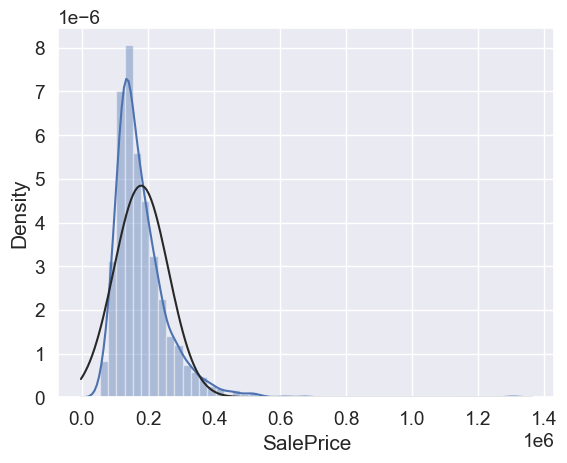

In [220]:
sns.distplot(final_predictions, fit=norm)
plt.xlabel("SalePrice")
plt.show()